# BC4 

Apex Pattern Deployers

- Marjorie Kinney *m20210647*
- Bruno Mendes *m20210627*
- Lucas Neves *m20211020*
- Farina Pontejos *m20210649*

Business Cases for Data Science

NOVA Information Management School

May 2022

https://github.com/fpontejos/bc4


## Initial Setup

### Imports

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import ceil
from datetime import timedelta, datetime
import os
import re
import warnings
import itertools
import collections

warnings.filterwarnings('ignore')



In [2]:
from matplotlib.colors import LinearSegmentedColormap


In [3]:
from functools import reduce

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [5]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


### Variables

In [6]:
COLORS = ['#2ec4b6', '#1e9fb4', '#0f7ab2', '#285892', '#49306b', '#7a3161', '#a13258', '#c63351', '#ea3449']

CAT_COLORS = ['#2EC4B6', '#0E79B2', '#49306B', '#9A325A', '#EA3449']
CONTRAST_COLORS = [COLORS[i] for i in range(len(COLORS)) if (i%2) == 0]

DIV_COLORS = ['#0e79b2', '#4b9ac3', '#84b8d4', '#bcd6e4', '#f4f4f4', '#c6c0d0', '#9b8eac', '#715e8b', '#49306b']

DIV_COL_HALF = ['#f4f4f4', '#bed3da', '#8ab2bf', '#5592a5', '#20718b']

UMP_COLORS = ['#22446D', '#FC9E4F', '#AB2346' ,'#6ABB5D']

DEFAULT_PALETTE = sns.color_palette(COLORS)
CONTRAST_PALETTE = sns.color_palette(CONTRAST_COLORS)
DIVERGENT_PALETTE = sns.color_palette(DIV_COLORS)
DIVHALF_PALETTE = sns.color_palette(DIV_COL_HALF)
CAT_PALETTE = sns.color_palette(CAT_COLORS)
UMP_PALETTE = sns.color_palette(UMP_COLORS)


DIV_CMAP = LinearSegmentedColormap.from_list("div_colors", DIV_COLORS)
DIV_H_CMAP = LinearSegmentedColormap.from_list("div_colors", DIV_COL_HALF)
CAT_CMAP = LinearSegmentedColormap.from_list("cat_colors", CAT_COLORS)
UMP_CMAP = LinearSegmentedColormap.from_list("ump_colors", UMP_COLORS)


SHOW_PLOTS = True
SAVE_PLOTS = True
RANDOM_STATE = 9

IMG_PATH = '../imgs/'
DATA_IN_PATH = '../../source/data/'
DATA_OUT_PATH = '../data_out/'


In [7]:
def save_fig(title, fig):
    if SAVE_PLOTS == True:
        fn = IMG_PATH + title.replace(' ','-') + '.png'
        fig.savefig(fn, bbox_inches='tight', transparent=True)
        


### Styles

In [8]:
sns.set(style="white")

sns.set_context("paper")
sns.set_palette(DEFAULT_PALETTE)


plt.rcParams['figure.dpi'] = 128

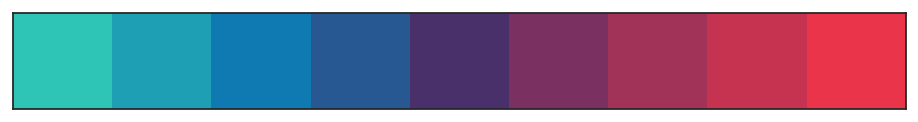

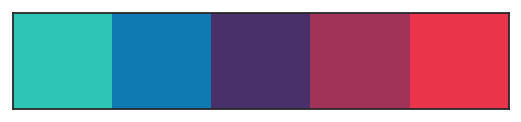

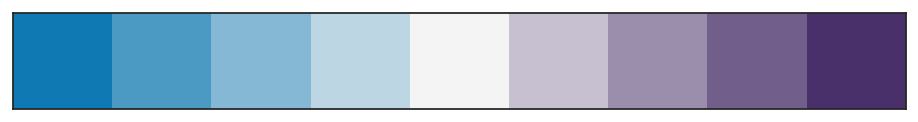

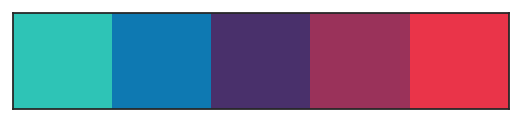

In [9]:
sns.palplot(DEFAULT_PALETTE)
sns.palplot(CONTRAST_PALETTE)
sns.palplot(DIVERGENT_PALETTE)
sns.palplot(CAT_PALETTE)
plt.show()

## Load Data

In [10]:
df_adjclose = pd.read_csv(DATA_IN_PATH + "adj_close.csv")
#df_adjclose.head(3)

In [11]:
df_close = pd.read_csv(DATA_IN_PATH + "close.csv")
#df_close.head(3)

In [12]:
df_high = pd.read_csv(DATA_IN_PATH + "high.csv")
#df_high.head(3)

In [13]:
df_low = pd.read_csv(DATA_IN_PATH + "low.csv")
#df_low.head(3)

In [14]:
df_open = pd.read_csv(DATA_IN_PATH + "open.csv")
#df_open.head(3)

In [15]:
df_vol = pd.read_csv(DATA_IN_PATH + "volume.csv")
#df_vol.head(3)

In [16]:
df_list = [df_adjclose,df_close,df_high,df_low]

In [17]:
def assemble_coin_df(coin_i):
    df_data = df_adjclose[['Date',coin_i]].rename(columns={coin_i:'adj_close'})\
            .merge(df_close[['Date',coin_i]].rename(columns={coin_i:'close'}), left_on='Date', right_on='Date')\
            .merge(df_high[['Date',coin_i]].rename(columns={coin_i:'high'}), left_on='Date', right_on='Date')\
            .merge(df_low[['Date',coin_i]].rename(columns={coin_i:'low'}), left_on='Date', right_on='Date')\
            .merge(df_open[['Date',coin_i]].rename(columns={coin_i:'open'}), left_on='Date', right_on='Date')\
            .merge(df_vol[['Date',coin_i]].rename(columns={coin_i:'volume'}), left_on='Date', right_on='Date')
    #df_data['Date'] = pd.to_datetime(df_data['Date']).dt.date
    #df_data['Date'] = df_data['Date'].dt.date
    return df_data

def assemble_coin_df2(coin_i):
    df_data = df_adjclose[['Date',coin_i]].rename(columns={coin_i:'adj_close'})\
            .merge(df_close[['Date',coin_i]].rename(columns={coin_i:'close'}), left_on='Date', right_on='Date')\
            .merge(df_high[['Date',coin_i]].rename(columns={coin_i:'high'}), left_on='Date', right_on='Date')\
            .merge(df_low[['Date',coin_i]].rename(columns={coin_i:'low'}), left_on='Date', right_on='Date')\
            .merge(df_open[['Date',coin_i]].rename(columns={coin_i:'open'}), left_on='Date', right_on='Date')\
            .merge(df_vol[['Date',coin_i]].rename(columns={coin_i:'volume'}), left_on='Date', right_on='Date')
    return df_data

df_ada   = assemble_coin_df('ADA-USD')
df_atom  = assemble_coin_df('ATOM-USD')
df_avax  = assemble_coin_df('AVAX-USD')
df_axs   = assemble_coin_df('AXS-USD')
df_btc   = assemble_coin_df('BTC-USD')
df_eth   = assemble_coin_df('ETH-USD')
df_link  = assemble_coin_df('LINK-USD')
df_luna1 = assemble_coin_df('LUNA1-USD')
df_matic = assemble_coin_df('MATIC-USD')
df_sol   = assemble_coin_df('SOL-USD')



In [18]:
## There are two days with prices, then a long period without. 
## Remove these two days.

df_avax.loc[df_avax['Date']=='2020-07-13',['adj_close', 'close', 'high', 'low', 'open', 'volume']] = np.nan
df_avax.loc[df_avax['Date']=='2020-07-14',['adj_close', 'close', 'high', 'low', 'open', 'volume']] = np.nan
#df_avax.loc[df_avax['Date']>='2020-07-13',['adj_close', 'close', 'high', 'low', 'open', 'volume']]


In [19]:
df_avax.columns

Index(['Date', 'adj_close', 'close', 'high', 'low', 'open', 'volume'], dtype='object')

In [20]:
df_coins_list = [df_ada, df_atom, df_avax, df_axs, df_btc, df_eth, df_link, df_luna1, df_matic, df_sol]
df_coins_suff = ['ada', 'atom', 'avax', 'axs', 'btc', 'eth', 'link', 'luna1', 'matic', 'sol']

In [21]:
for i in range(len(df_coins_suff)):
    di = df_coins_list[i]
    df_coins_list[i] = df_coins_list[i].add_prefix(df_coins_suff[i]+'_')
    date_col = df_coins_suff[i]+'_Date'
    df_coins_list[i].rename(columns={date_col: 'Date'}, inplace=True)
    

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='left'), df_coins_list)

In [22]:
df_merged['Date'].min()

'2017-04-26'

In [23]:
df_merged['Date'].max()

'2022-04-25'

In [24]:
df_merged

,Date,ada_adj_close,ada_close,ada_high,ada_low,ada_open,ada_volume,atom_adj_close,atom_close,atom_high,...,matic_high,matic_low,matic_open,matic_volume,sol_adj_close,sol_close,sol_high,sol_low,sol_open,sol_volume
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08,23.305845,23.305845,24.913876,...,1.465750,1.368370,1.417712,6.526199e+08,101.776138,101.776138,109.765327,100.767151,105.497673,1.838572e+09
1822,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08,23.089931,23.089931,23.845695,...,1.496747,1.374800,1.379697,1.281223e+09,100.612053,100.612053,103.498146,99.579430,101.757423,1.274794e+09
1823,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08,23.271534,23.271534,23.452826,...,1.406944,1.350815,1.399106,5.494467e+08,100.744438,100.744438,102.771233,98.781570,100.619781,8.232525e+08
1824,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08,22.330360,22.330360,23.259838,...,1.373304,1.335365,1.365753,4.209603e+08,99.235794,99.235794,102.216682,99.008514,100.727188,8.182660e+08


## Understanding the Data

In [25]:
df_coins_list[0]

,Date,ada_adj_close,ada_close,ada_high,ada_low,ada_open,ada_volume
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08
1822,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08
1823,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08
1824,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08


In [26]:
print(df_coins_suff[0]+'_high')
df_coins_list[0]['Date'] = pd.to_datetime(df_coins_list[0]['Date']).dt.date
df_coins_list[0].set_index('Date')


ada_high


,ada_adj_close,ada_close,ada_high,ada_low,ada_open,ada_volume
Date,,,,,,
2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08
2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08
2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08


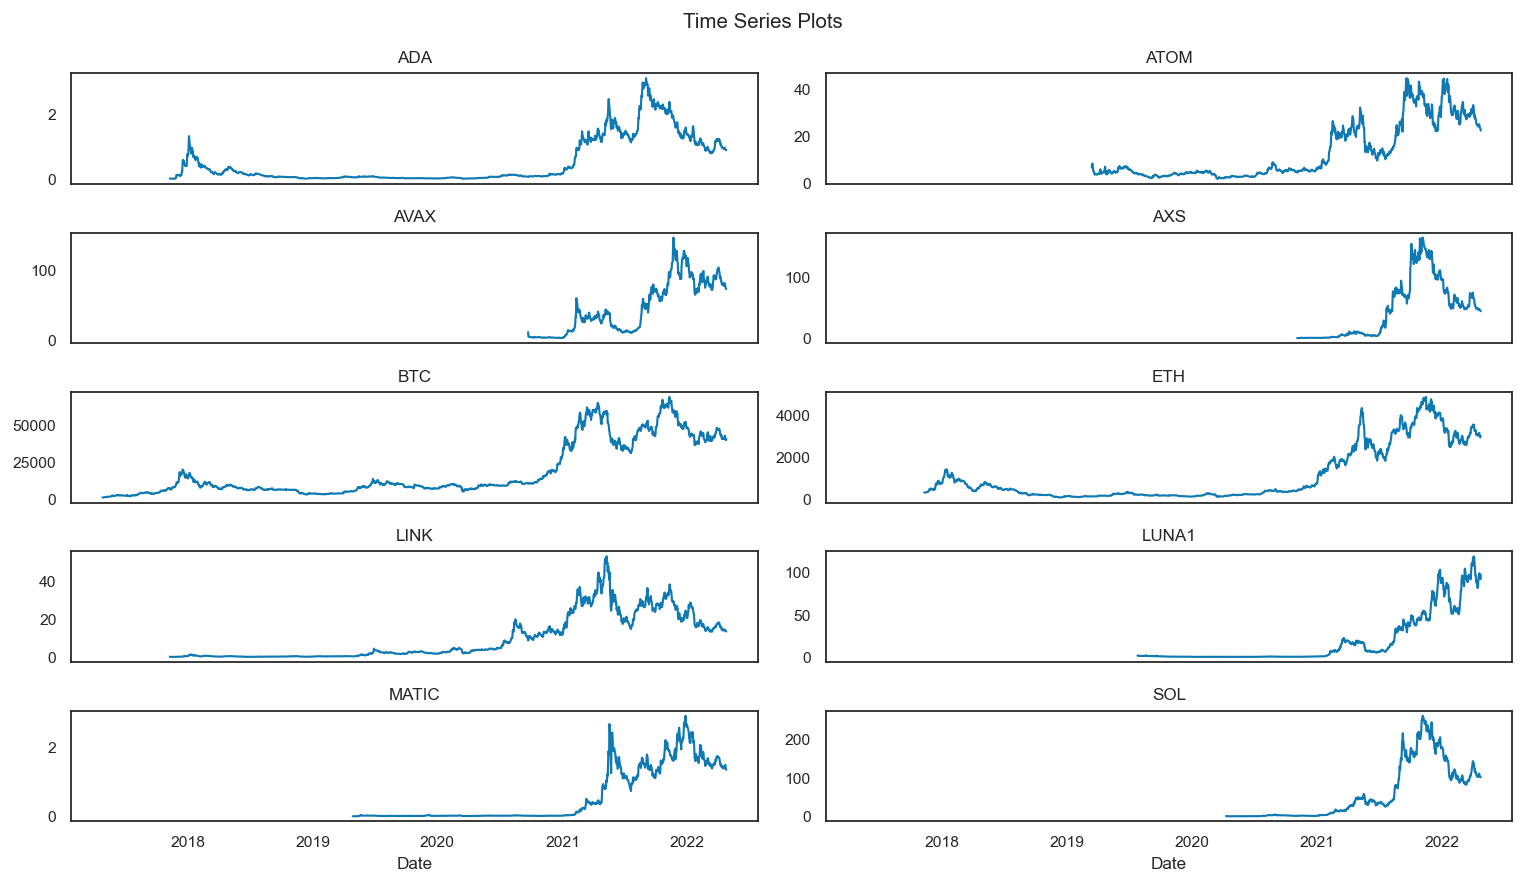

In [27]:
fig, axes = plt.subplots(5,2,figsize=(12,7), sharex=True)

for df_i in range(len(df_coins_list)):
    df_ts = df_coins_list[df_i].copy()
    df_ts['Date'] = pd.to_datetime(df_coins_list[0]['Date']).dt.date
    df_ts.set_index('Date', inplace=True)

    hi = df_coins_suff[df_i]+'_high'
    ci = len(CAT_COLORS)%(df_i+1)
    ax = axes.flatten()[df_i]
    df_ts.loc[:,[hi]].plot(ax=ax, color=CAT_COLORS[1], legend=False)

    ax.set_title(str.upper(df_coins_suff[df_i]))
    #ax.legend([])
    
fig.suptitle("Time Series Plots")
plt.tight_layout()
plt.show()

save_fig("Time Series Plots", fig)


In [28]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as smd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.stats.outliers_influence as oi


In [29]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [30]:

endog_avax = df_avax.loc[:,['Date','high']].dropna()

print(pd.to_datetime(endog_avax.loc[~endog_avax['high'].isna(),['Date','high']]['Date']).min().strftime('%Y-%m-%d'))
print(pd.to_datetime(endog_avax.loc[~endog_avax['high'].isna(),['Date','high']]['Date']).max().strftime('%Y-%m-%d'))


2020-09-22
2022-04-25


In [31]:
#endog.dtypes

In [32]:
#endog_['Date2'] = pd.to_datetime((endog_['Date']).astype("str"))
#endog_

In [33]:
endog       = df_avax.loc[:,['Date','high']].dropna()
endog['Date'] = pd.to_datetime(endog['Date'])

endog_start = endog.loc[~endog['high'].isna(),['Date','high']]['Date'].min().strftime('%Y-%m-%d')
endog_end   = endog.loc[~endog['high'].isna(),['Date','high']]['Date'].max().strftime('%Y-%m-%d')



endog_ = pd.DataFrame(pd.period_range(endog_start,endog_end,freq='D'), columns=['Date'])
endog_['Date2'] = pd.to_datetime((endog_['Date']).astype("str"))
endog_.set_index('Date', inplace=True)

endog__ = endog_.merge(endog, left_on='Date2', right_on='Date', how='left')
#endog__ = endog_.set_index('Date').join(endog.set_index('Date'),how='left')
#endog.drop(columns=['Date'], inplace=True)


In [34]:
#endog = endog.loc[endog.index>='2021-01-01']

In [35]:
endog

,Date,high
1245,2020-09-22,11.463443
1246,2020-09-23,5.329310
1247,2020-09-24,4.751878
1248,2020-09-25,4.958673
1249,2020-09-26,4.817752
...,...,...
1821,2022-04-21,80.008301
1822,2022-04-22,77.152420
1823,2022-04-23,74.369293
1824,2022-04-24,73.437004


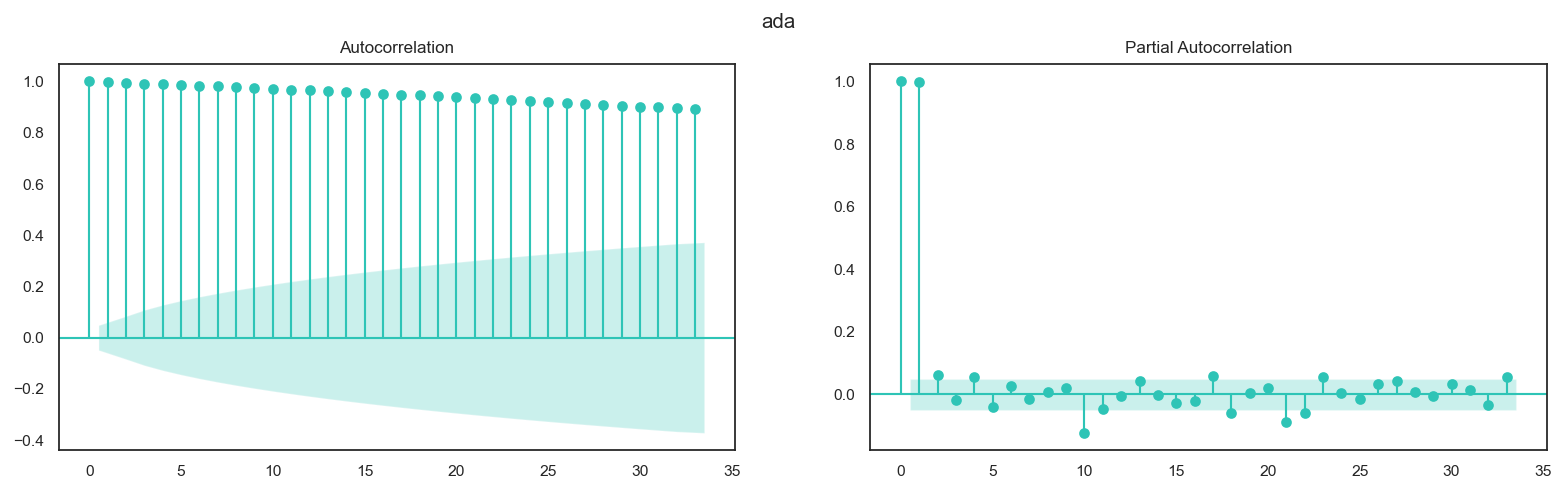

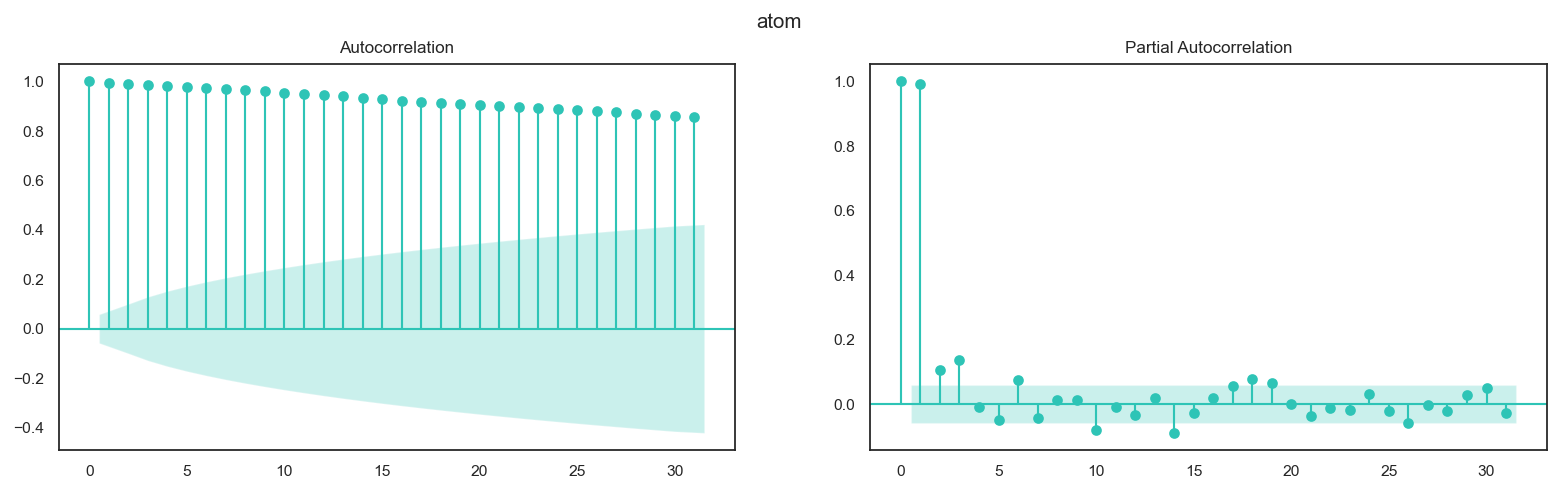

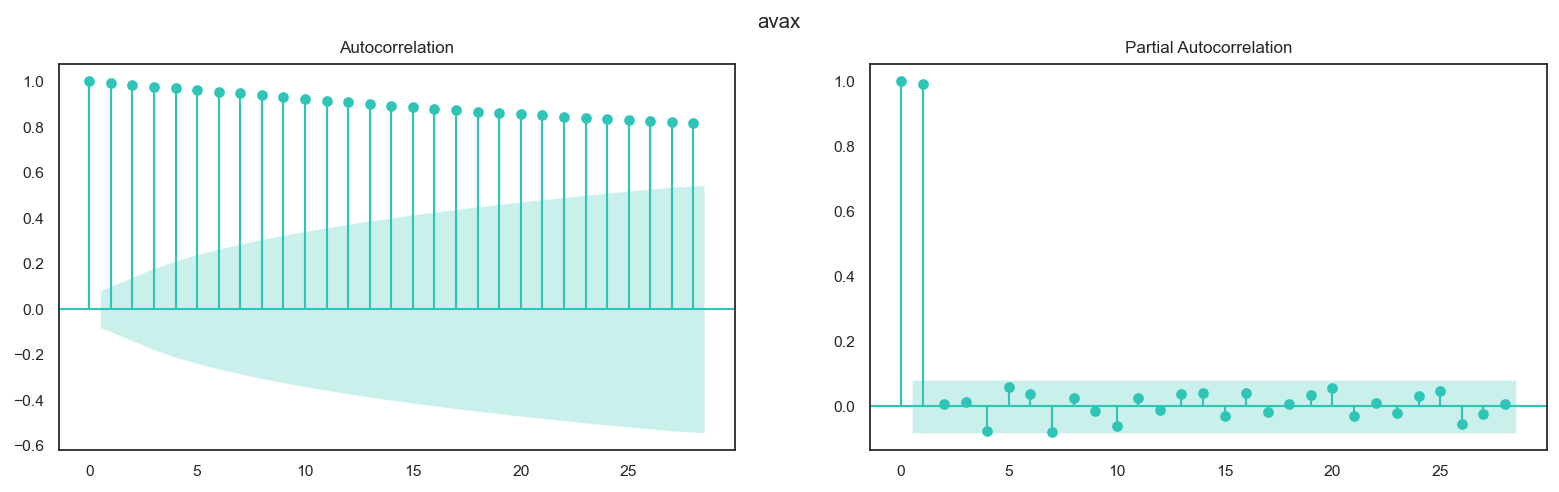

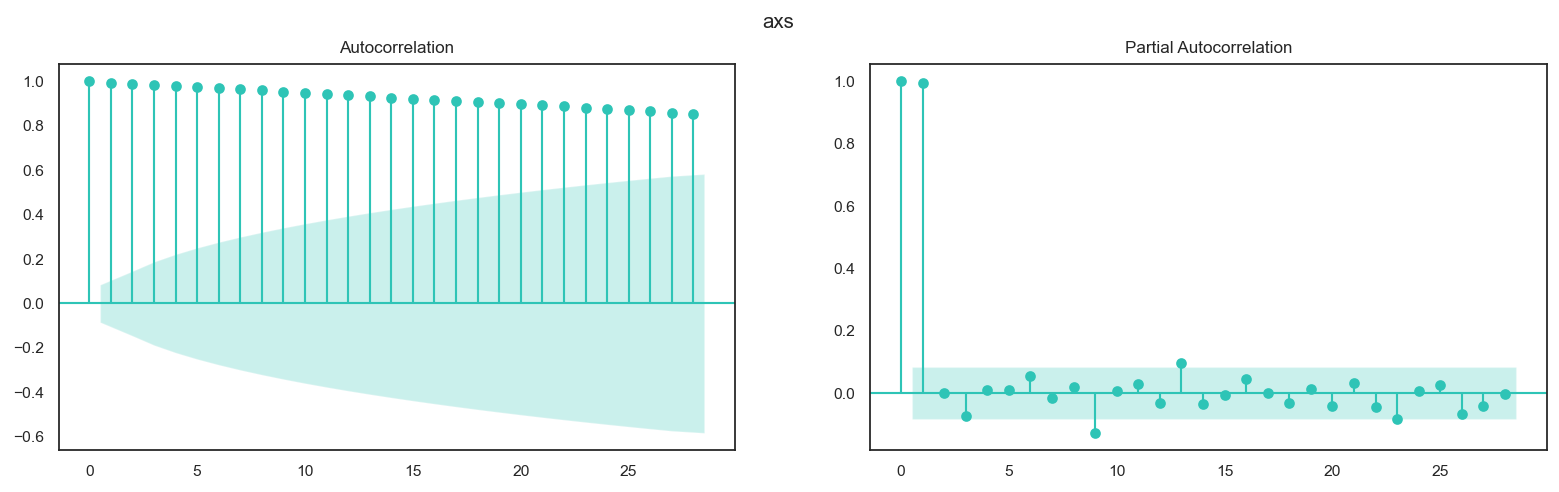

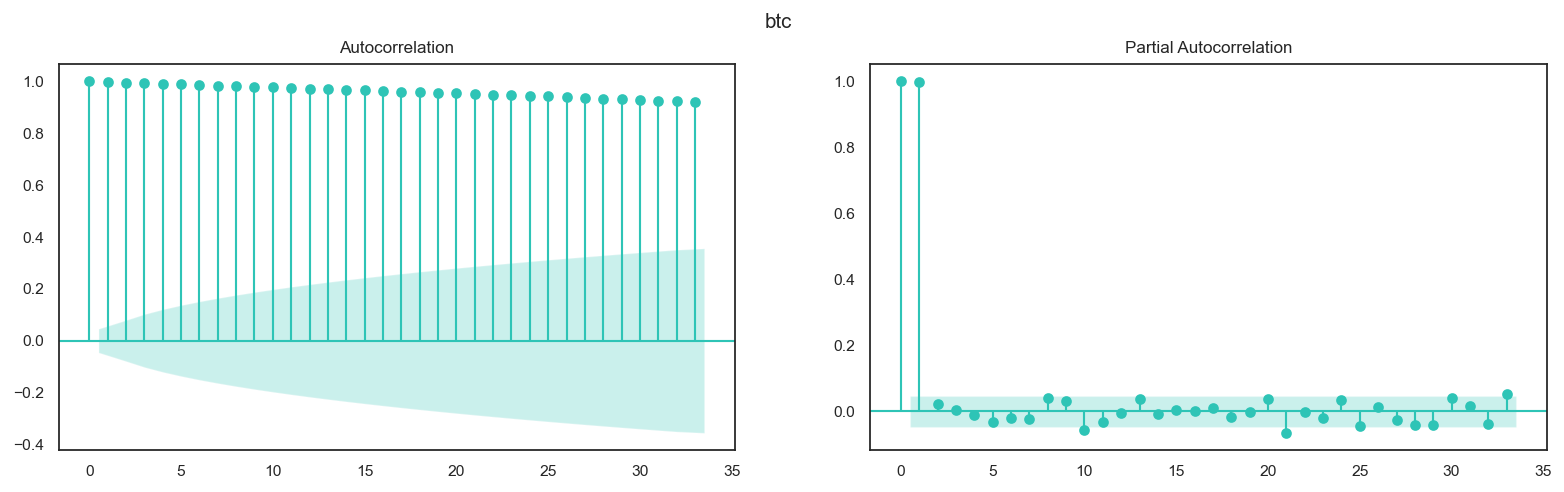

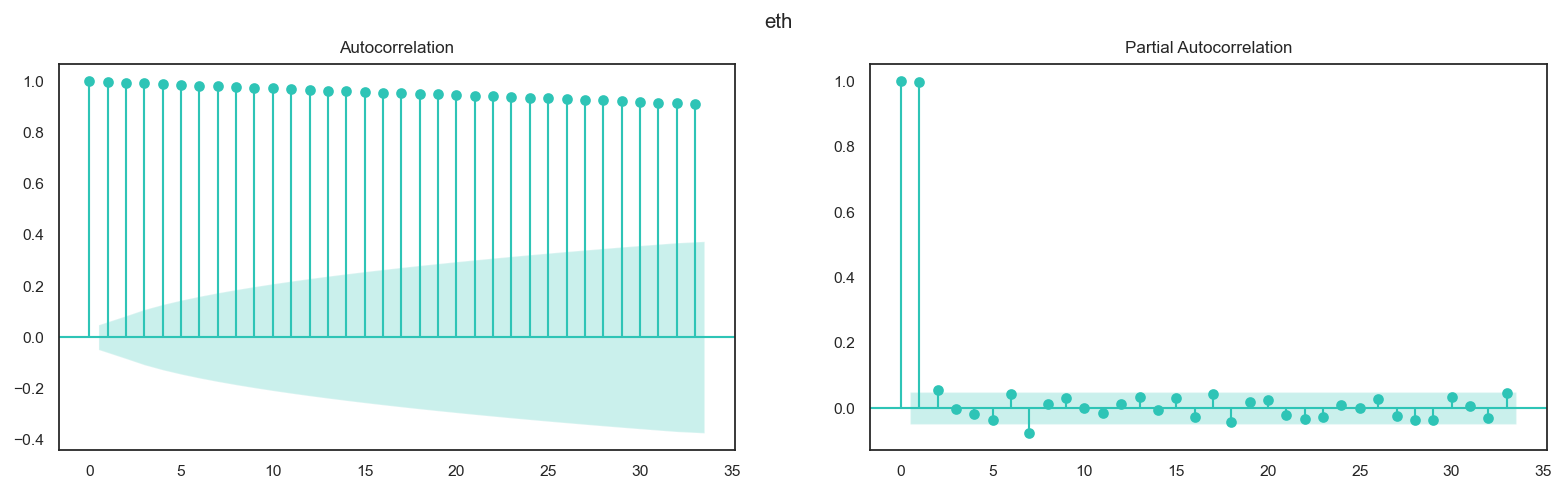

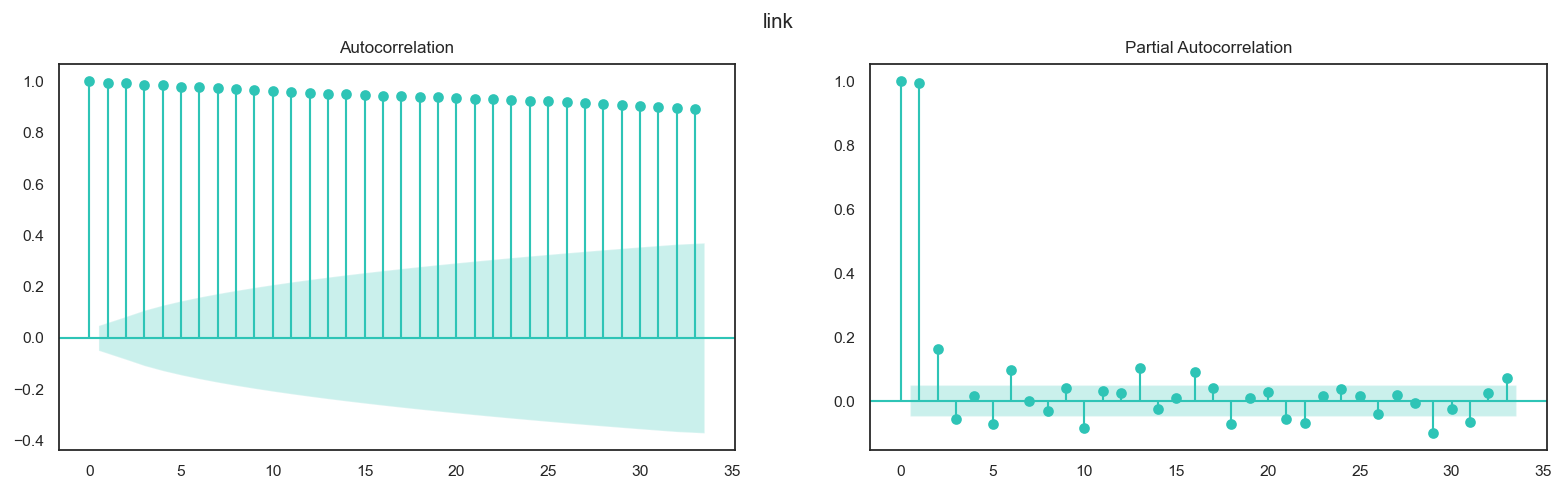

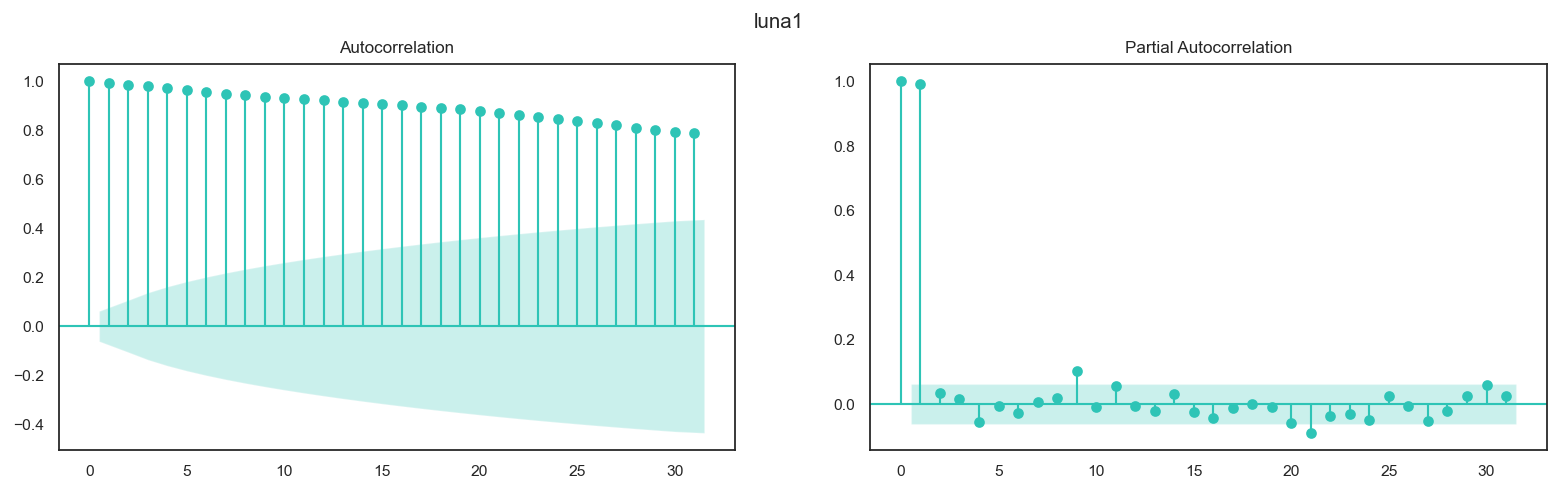

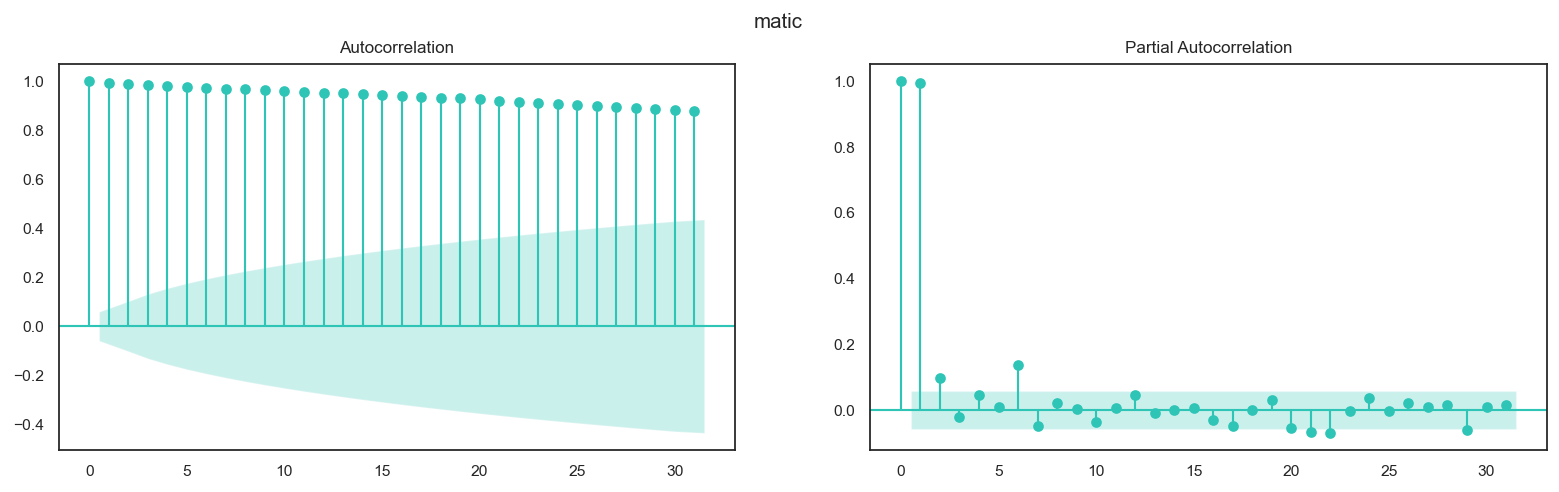

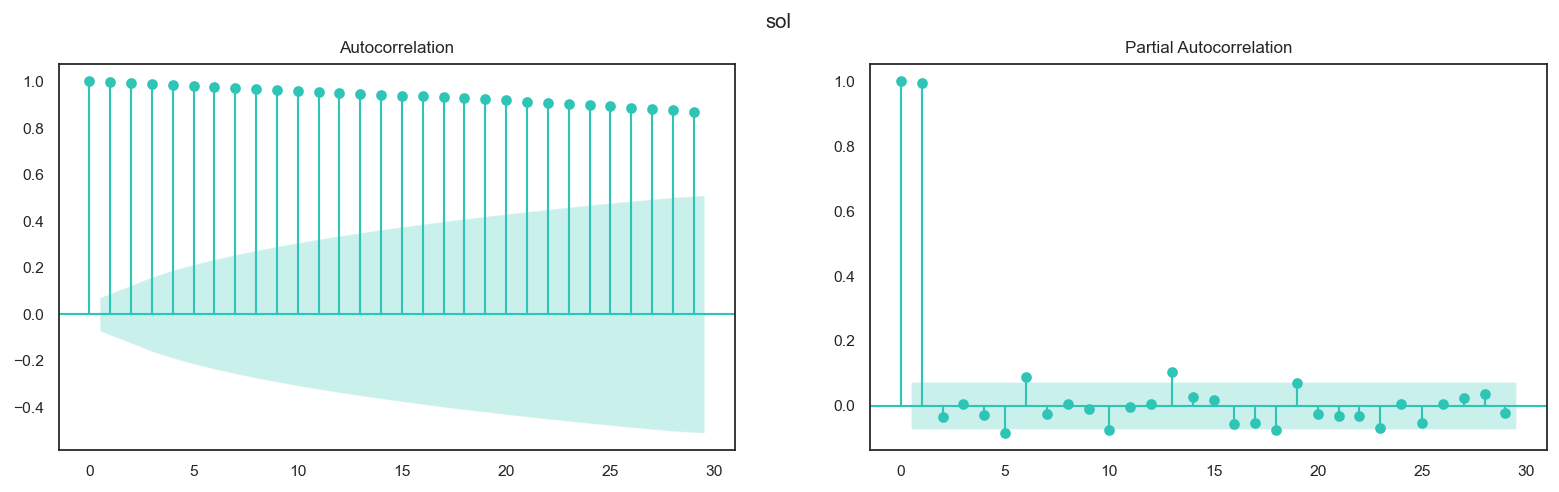

In [36]:
for df_i in range(len(df_coins_list)):
    
    hi = df_coins_suff[df_i] + "_close"
    endog_       = (df_coins_list[df_i]).loc[:,['Date',hi]].dropna()
    endog_['Date'] = pd.to_datetime(endog_['Date'])
    
    endog_start = endog_.loc[:,['Date',hi]].dropna()['Date'].min().strftime('%Y-%m-%d')
    endog_end   = endog_.loc[:,['Date',hi]].dropna()['Date'].max().strftime('%Y-%m-%d')



    endog_.index = pd.period_range(endog_start,endog_end,freq='D')

    endog_.drop(columns=['Date'], inplace=True)

    
    fig, axes = plt.subplots(1, 2, figsize=(15,4))

    sm.graphics.tsa.plot_acf(endog_, ax=axes[0])
    sm.graphics.tsa.plot_pacf(endog_, method="ywm", ax=axes[1])
    
    fig.suptitle(df_coins_suff[df_i])

    plt.show()

In [37]:
#endog.set_index('Date')

In [38]:
#endog.drop(columns=['Date'])

*********************************************************************************************
********************************** ada **********************************
2017-11-09 2022-04-25


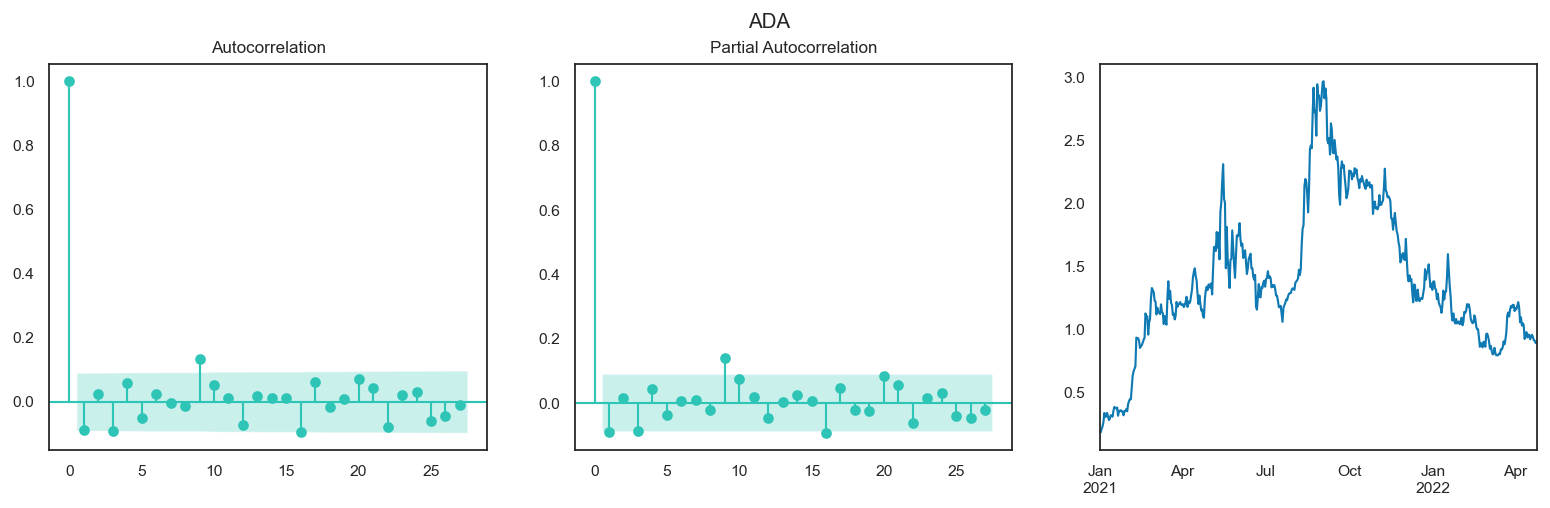

Optimization terminated successfully.
         Current function value: -0.966436
         Iterations: 4
         Function evaluations: 174


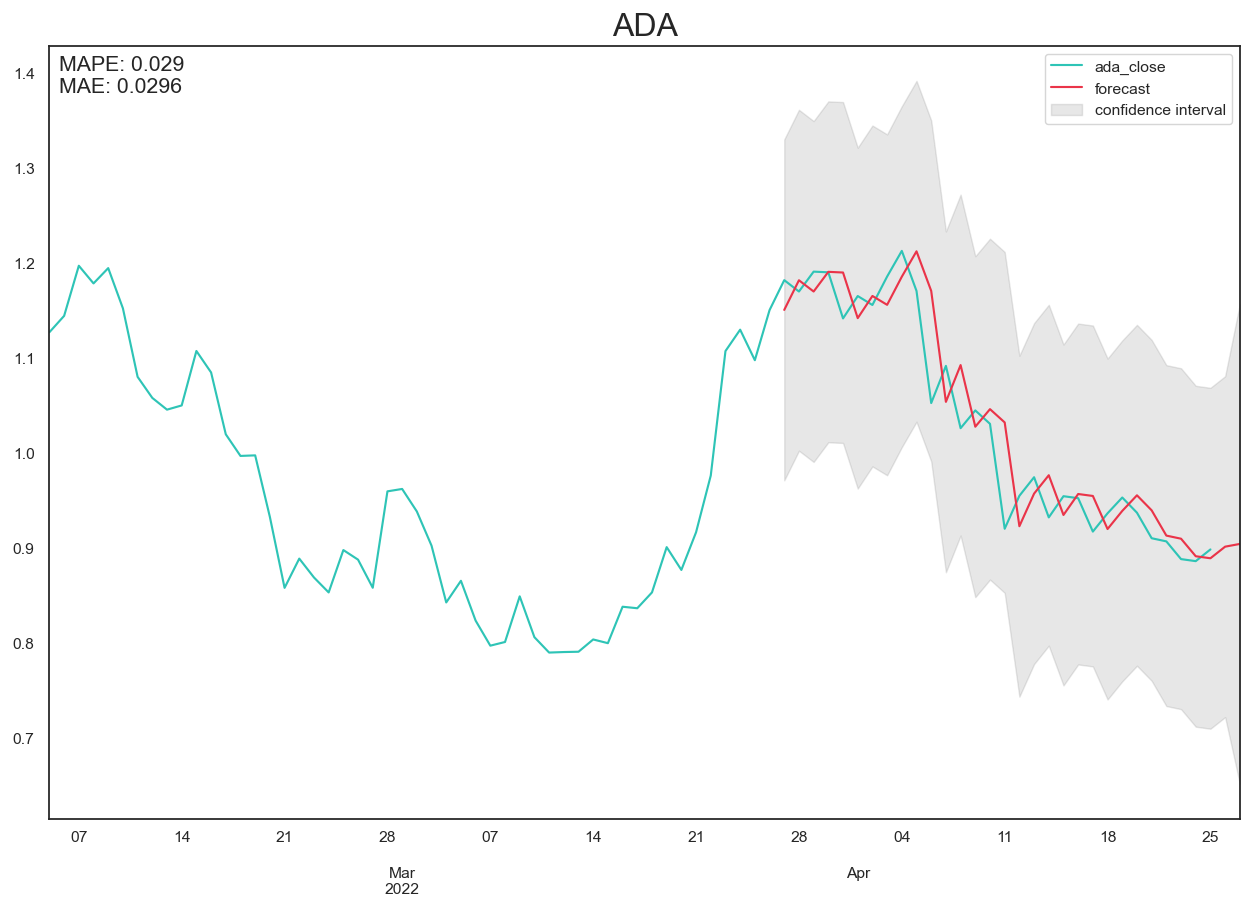

*********************************************************************************************
********************************** atom **********************************
2019-03-14 2022-04-25


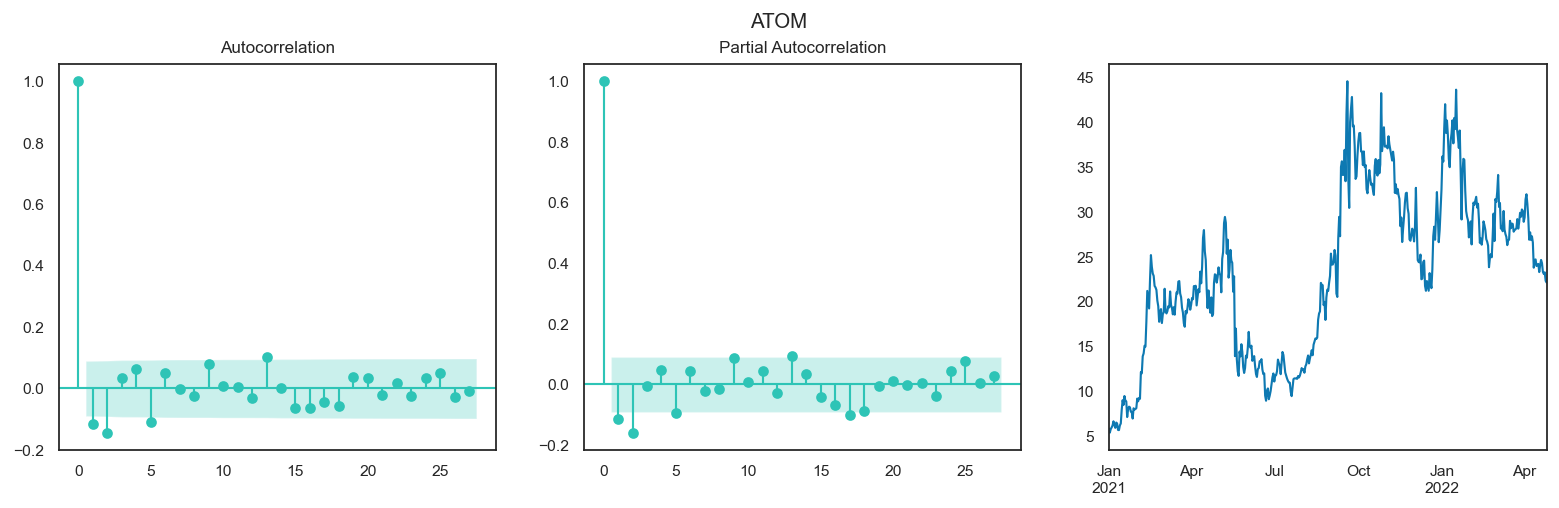

Optimization terminated successfully.
         Current function value: 2.081813
         Iterations: 2
         Function evaluations: 77


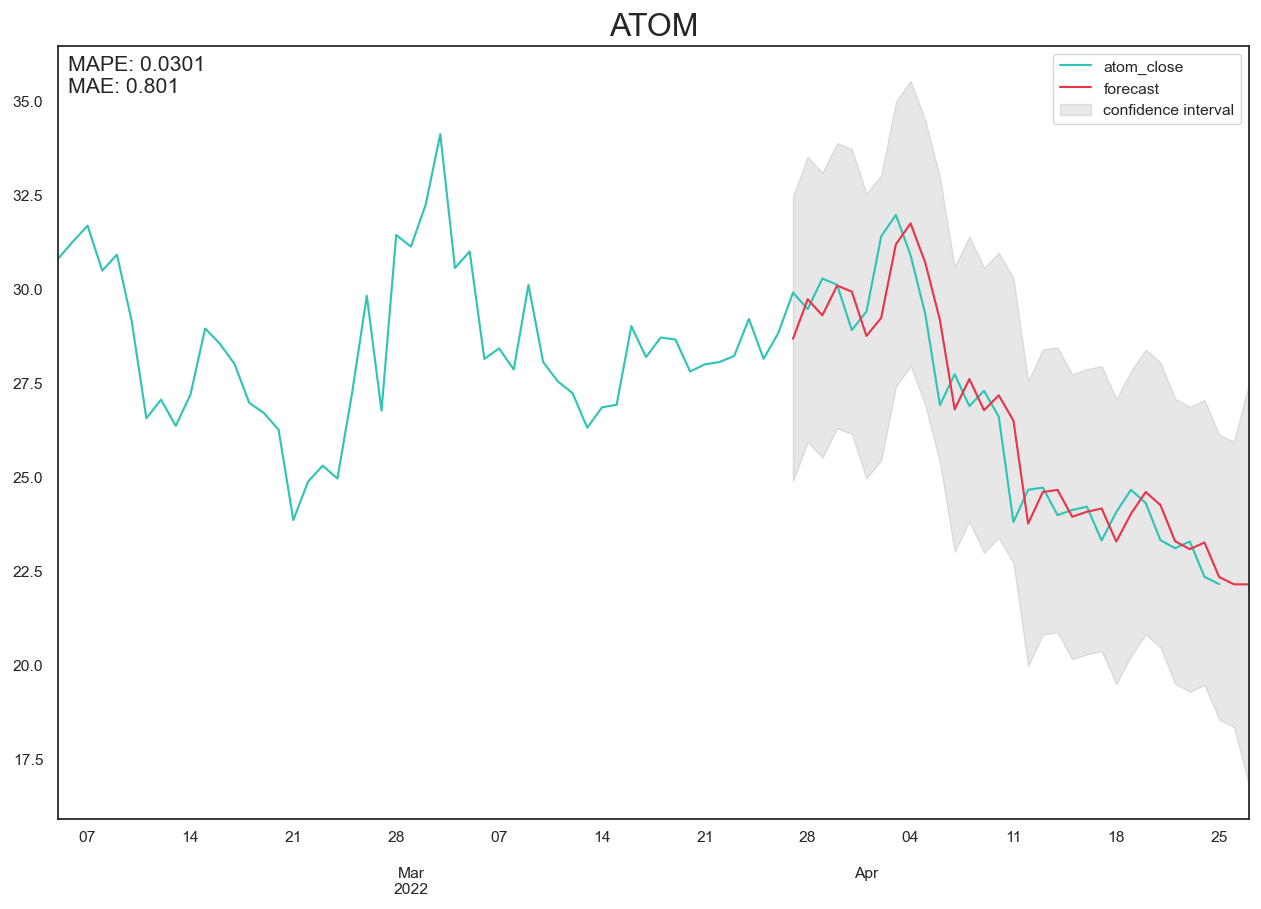

*********************************************************************************************
********************************** avax **********************************
2020-09-22 2022-04-25


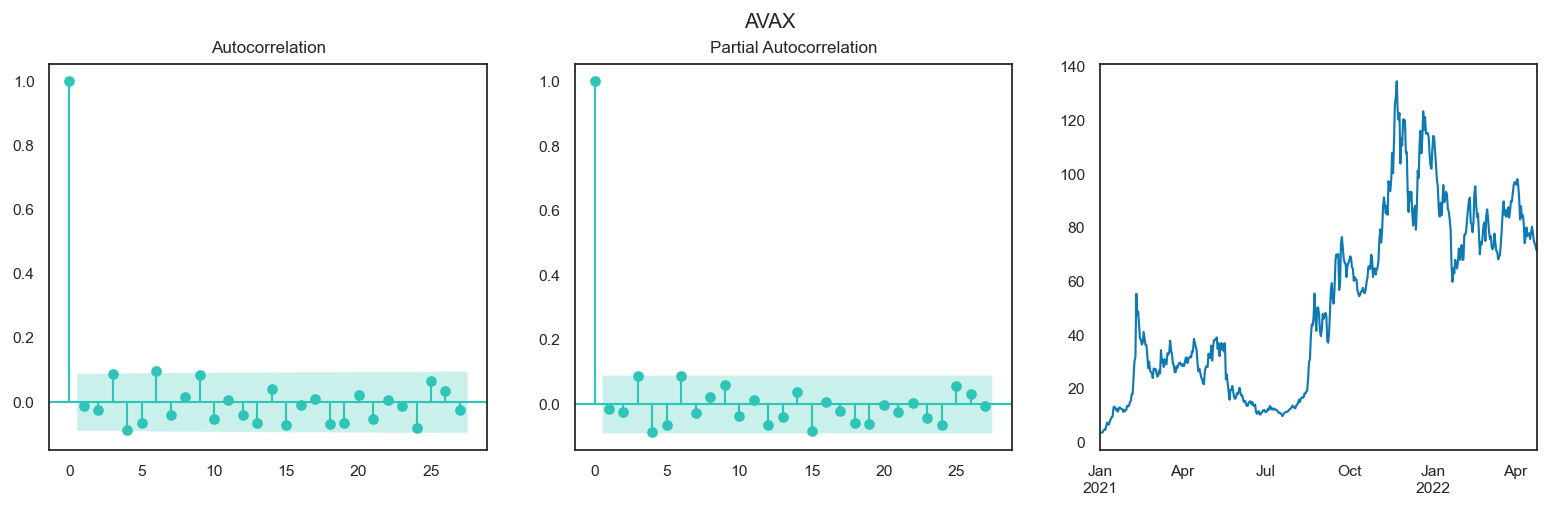

Optimization terminated successfully.
         Current function value: 2.883985
         Iterations: 2
         Function evaluations: 73


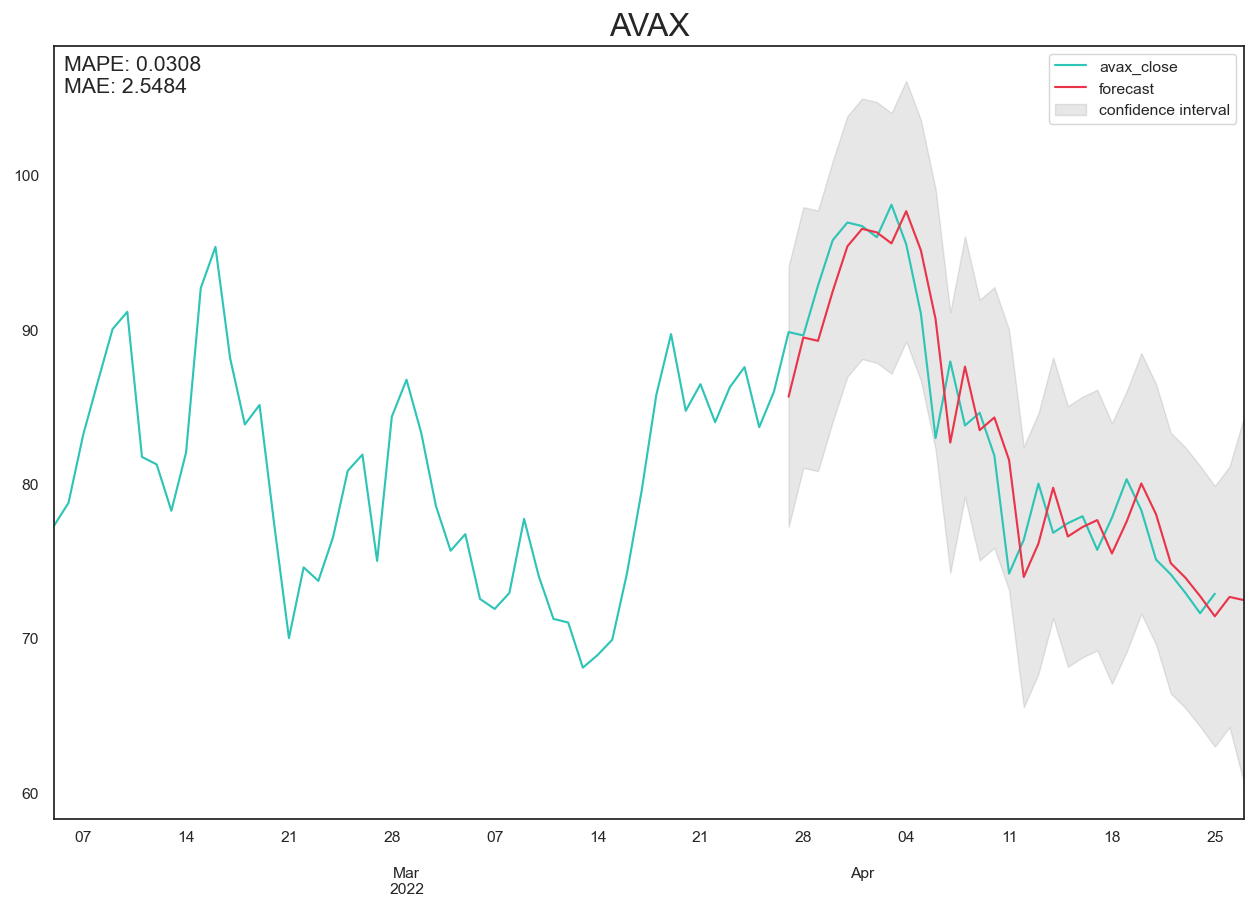

*********************************************************************************************
********************************** axs **********************************
2020-11-04 2022-04-25


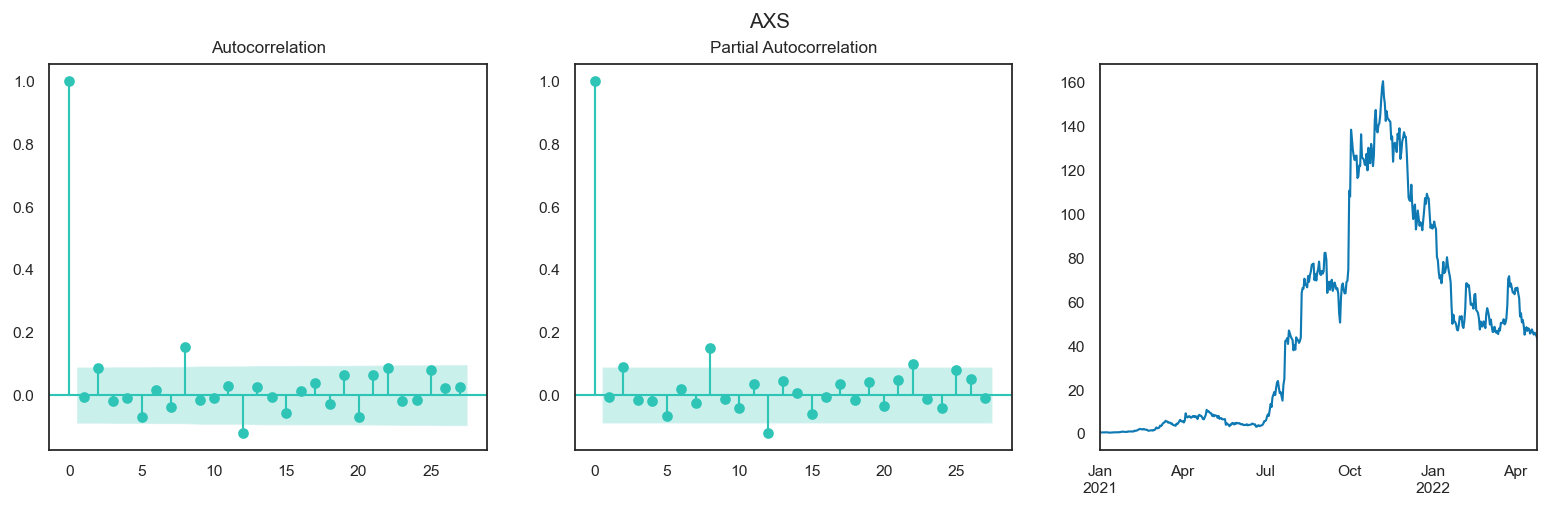

Optimization terminated successfully.
         Current function value: 2.895316
         Iterations: 2
         Function evaluations: 75


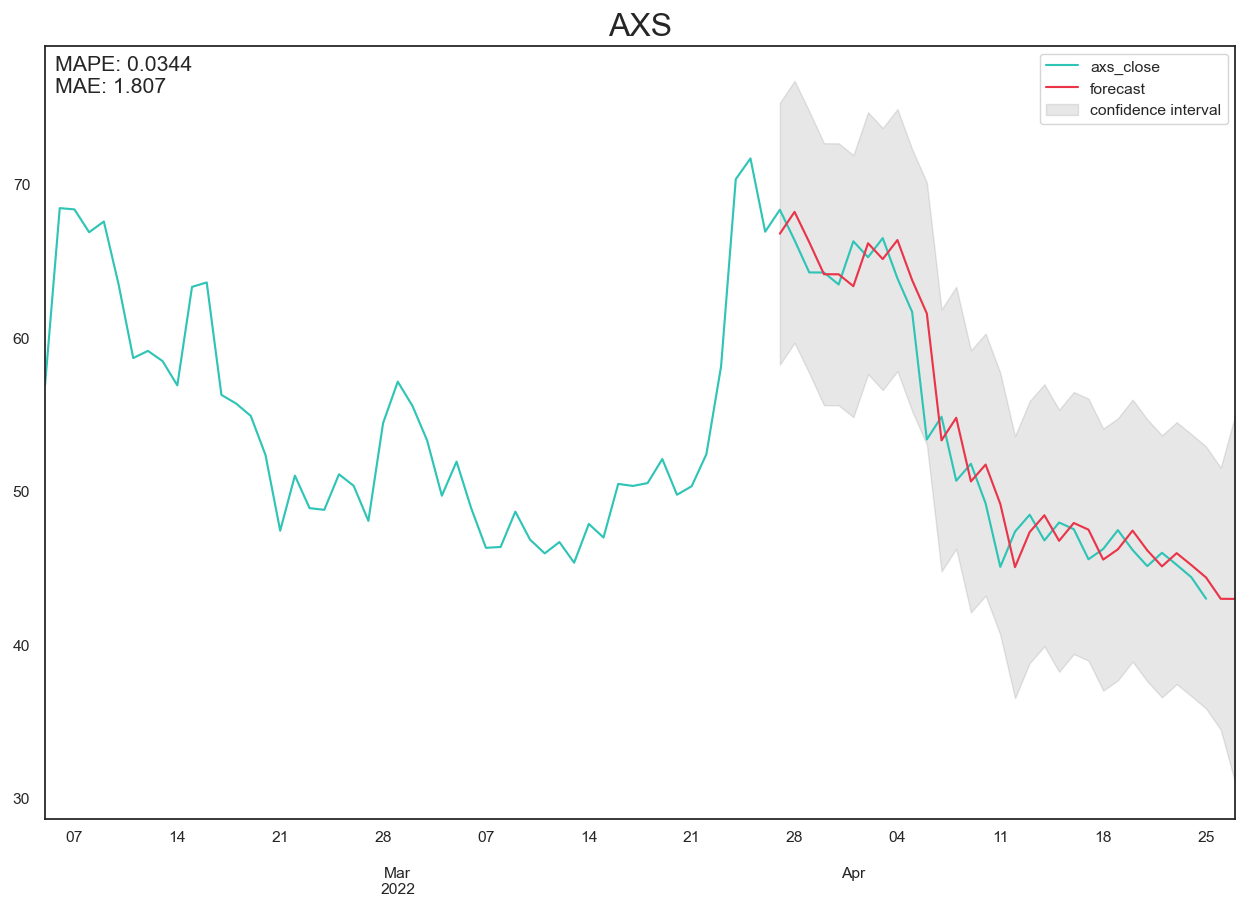

*********************************************************************************************
********************************** btc **********************************
2017-04-26 2022-04-25


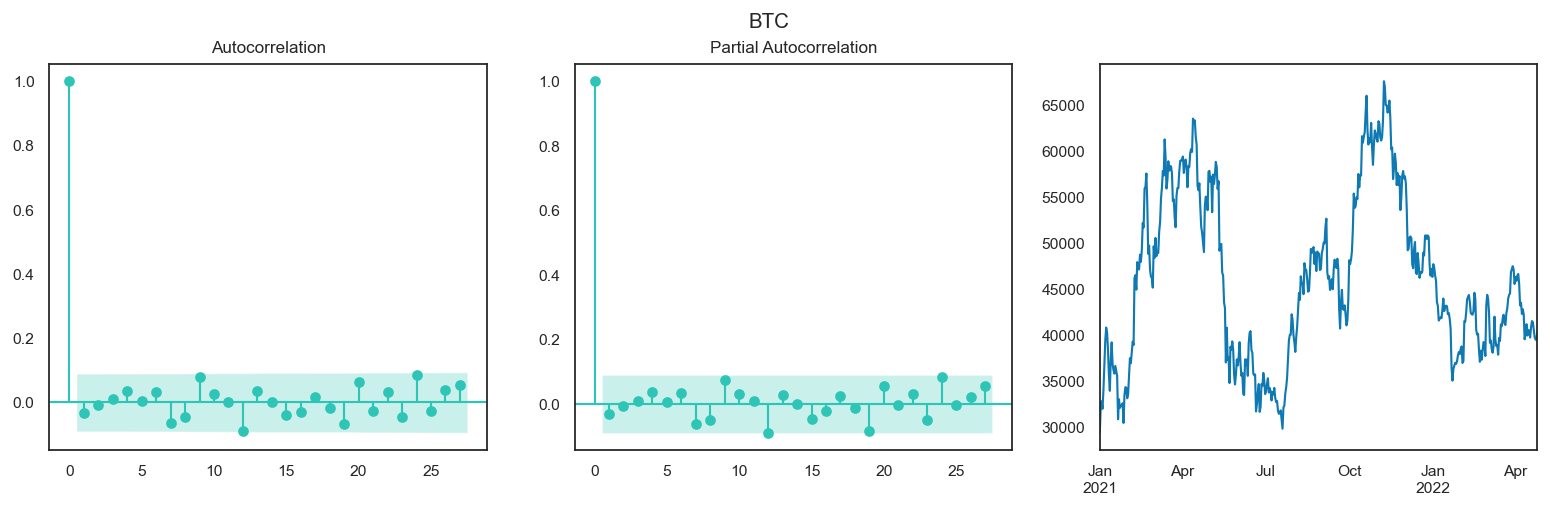

Optimization terminated successfully.
         Current function value: 8.928641
         Iterations: 1
         Function evaluations: 32


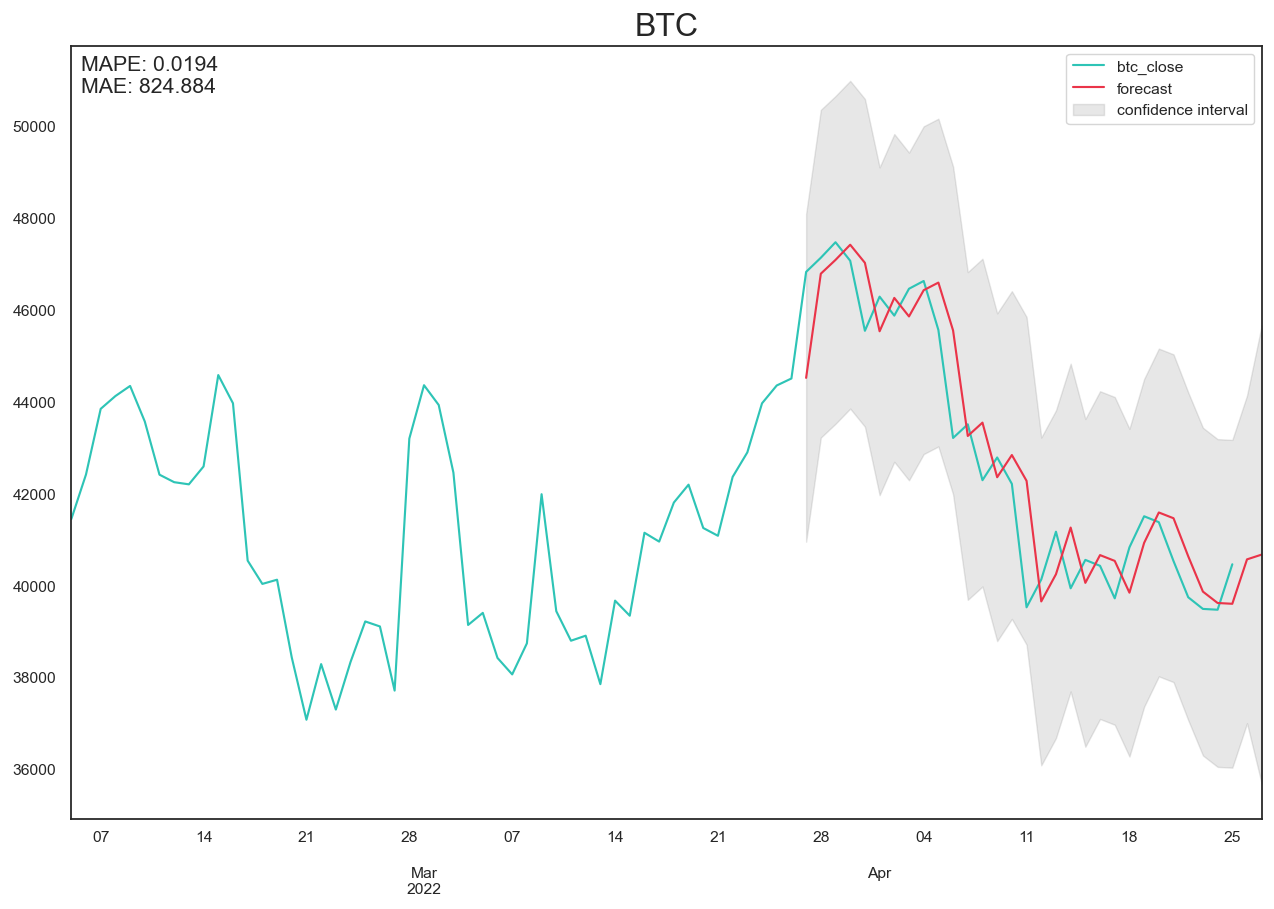

*********************************************************************************************
********************************** eth **********************************
2017-11-09 2022-04-25


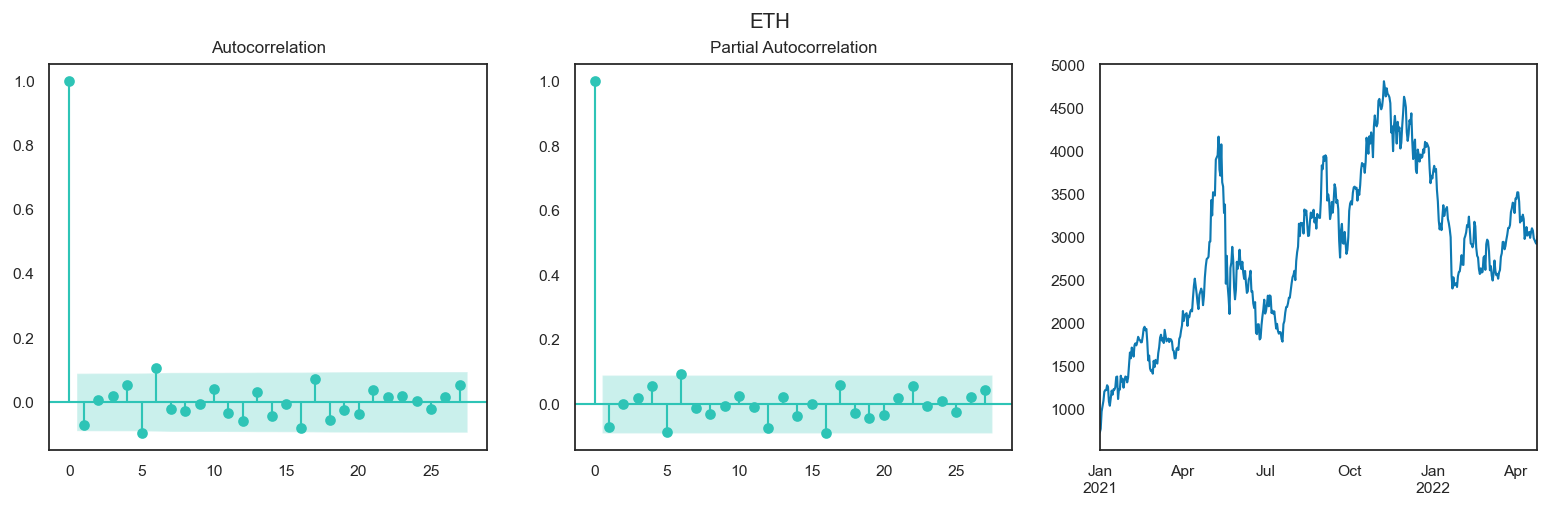

Optimization terminated successfully.
         Current function value: 6.393899
         Iterations: 2
         Function evaluations: 69


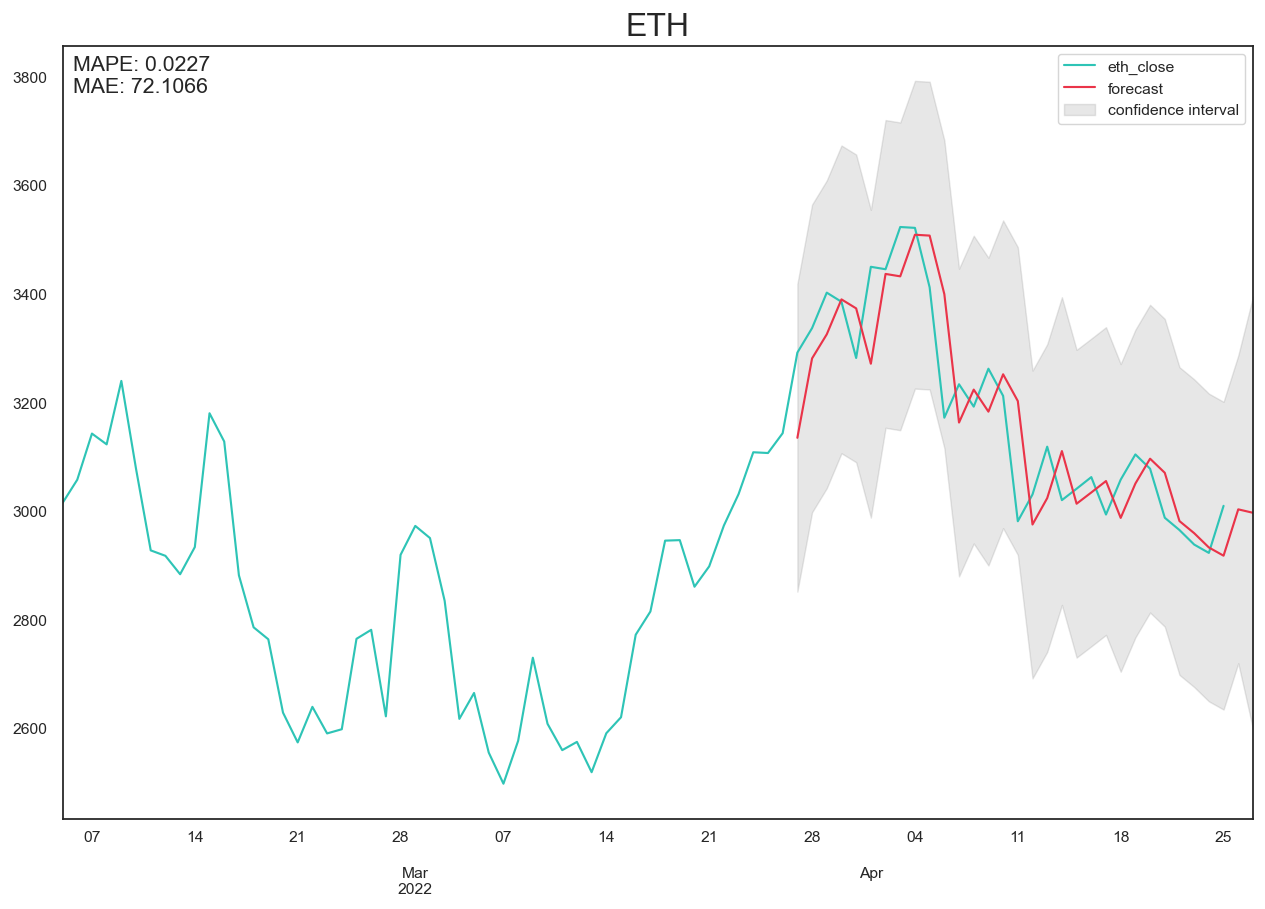

*********************************************************************************************
********************************** link **********************************
2017-11-09 2022-04-25


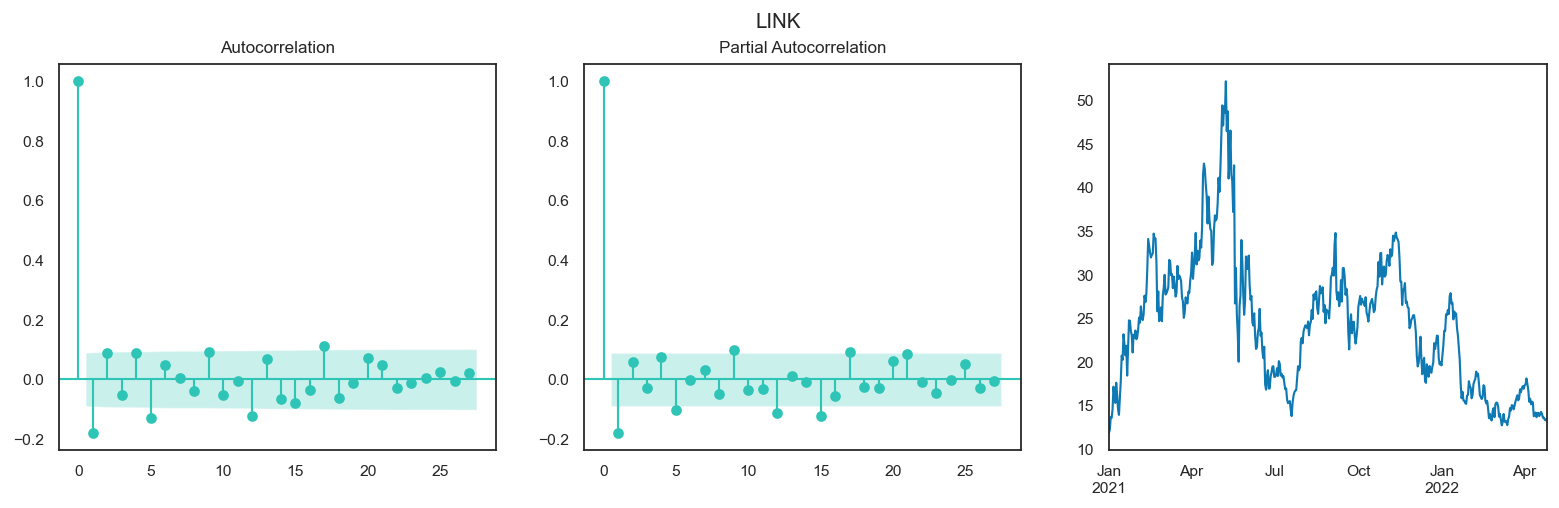

Optimization terminated successfully.
         Current function value: 2.068826
         Iterations: 2
         Function evaluations: 75


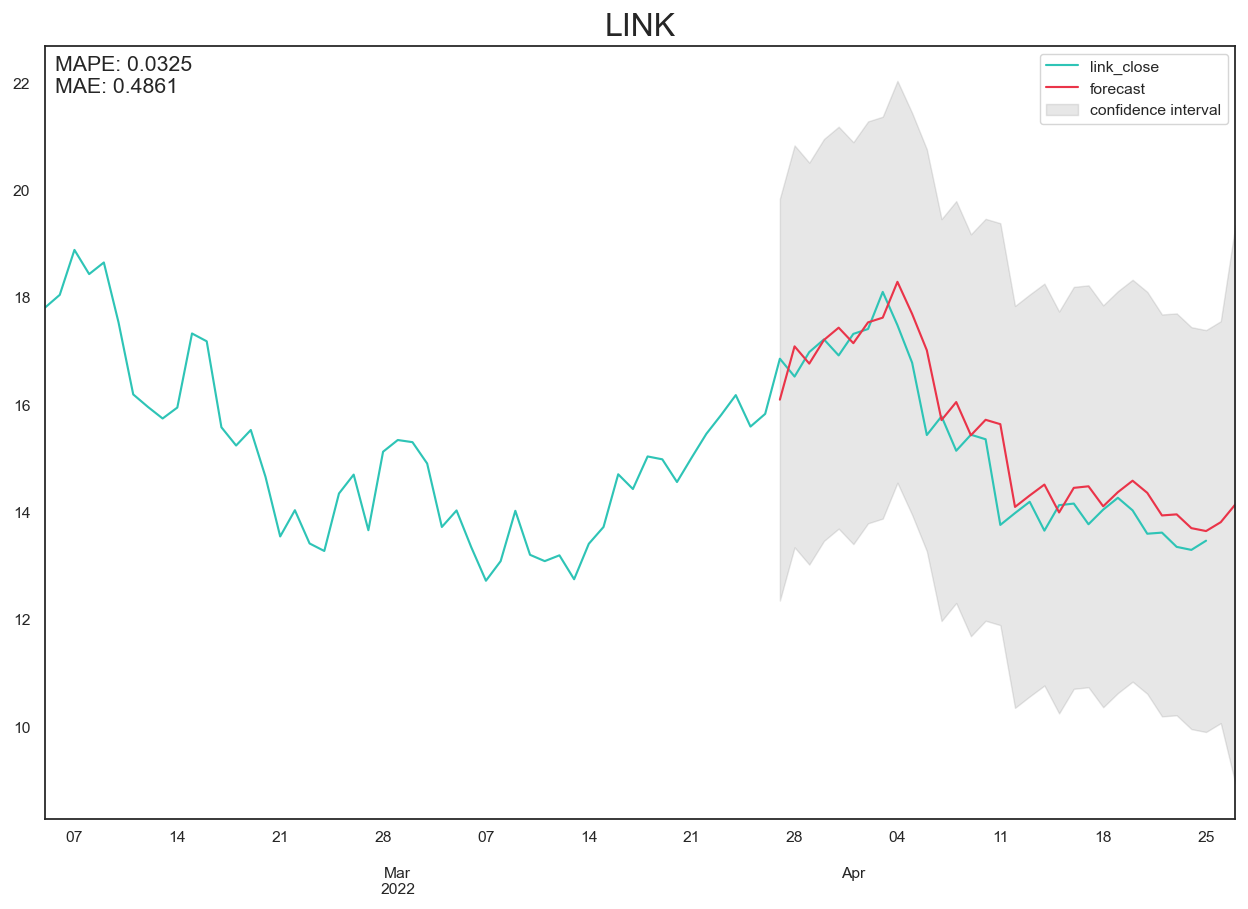

*********************************************************************************************
********************************** luna1 **********************************
2019-07-26 2022-04-25


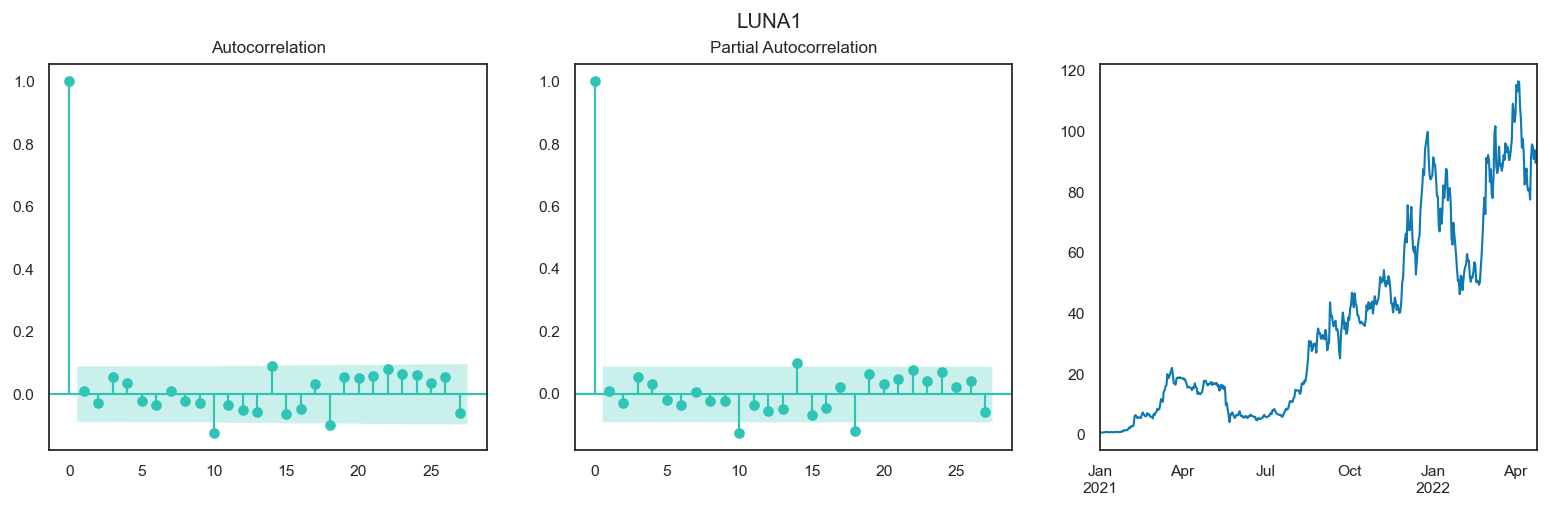

Optimization terminated successfully.
         Current function value: 2.560384
         Iterations: 2
         Function evaluations: 63


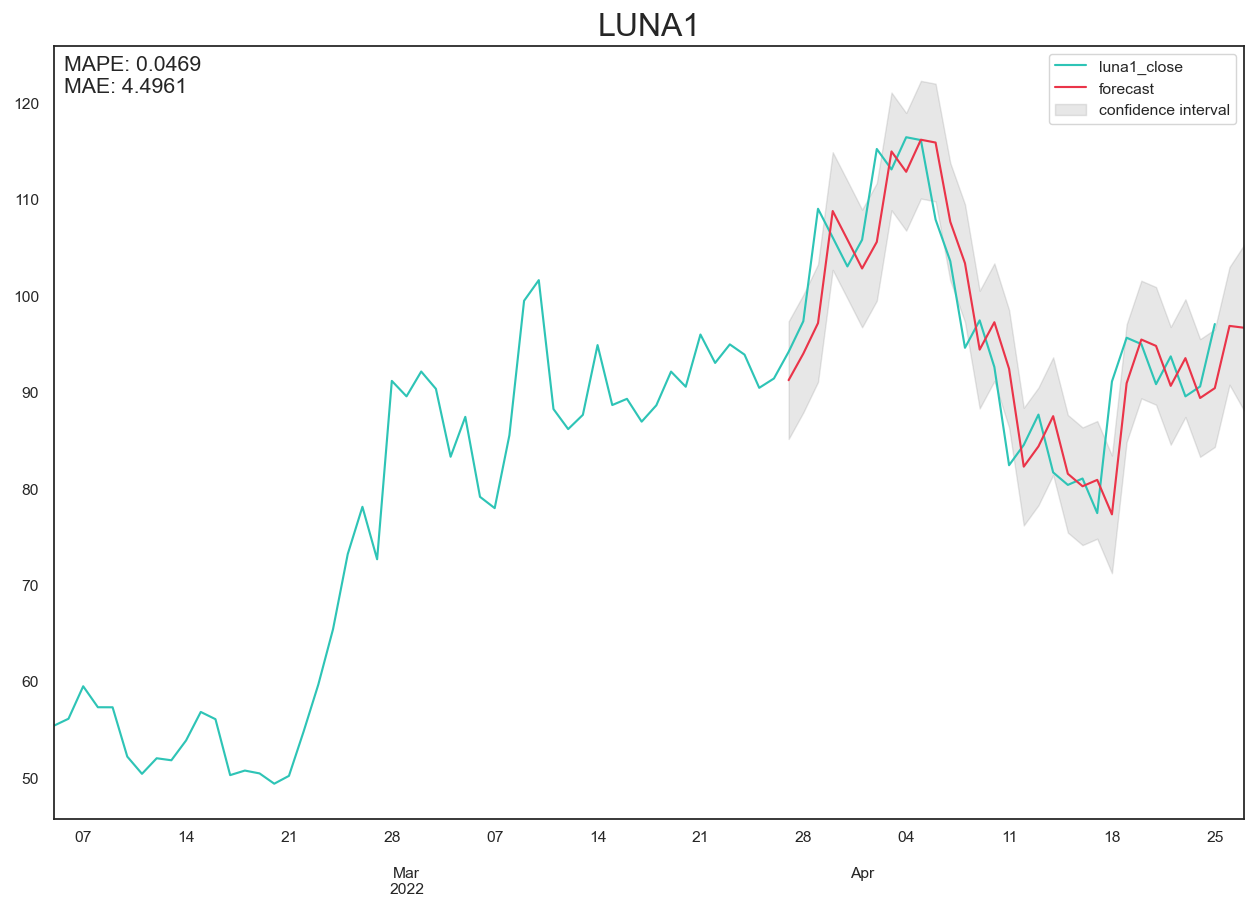

*********************************************************************************************
********************************** matic **********************************
2019-04-28 2022-04-25


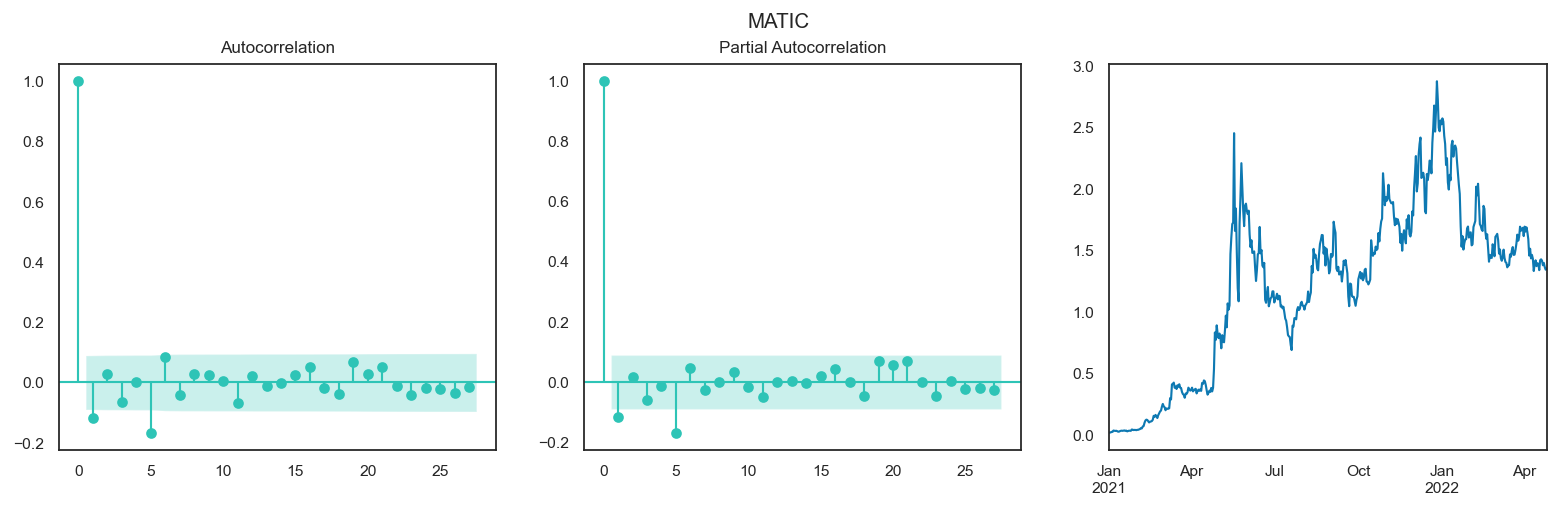

Optimization terminated successfully.
         Current function value: -0.755309
         Iterations: 3
         Function evaluations: 122


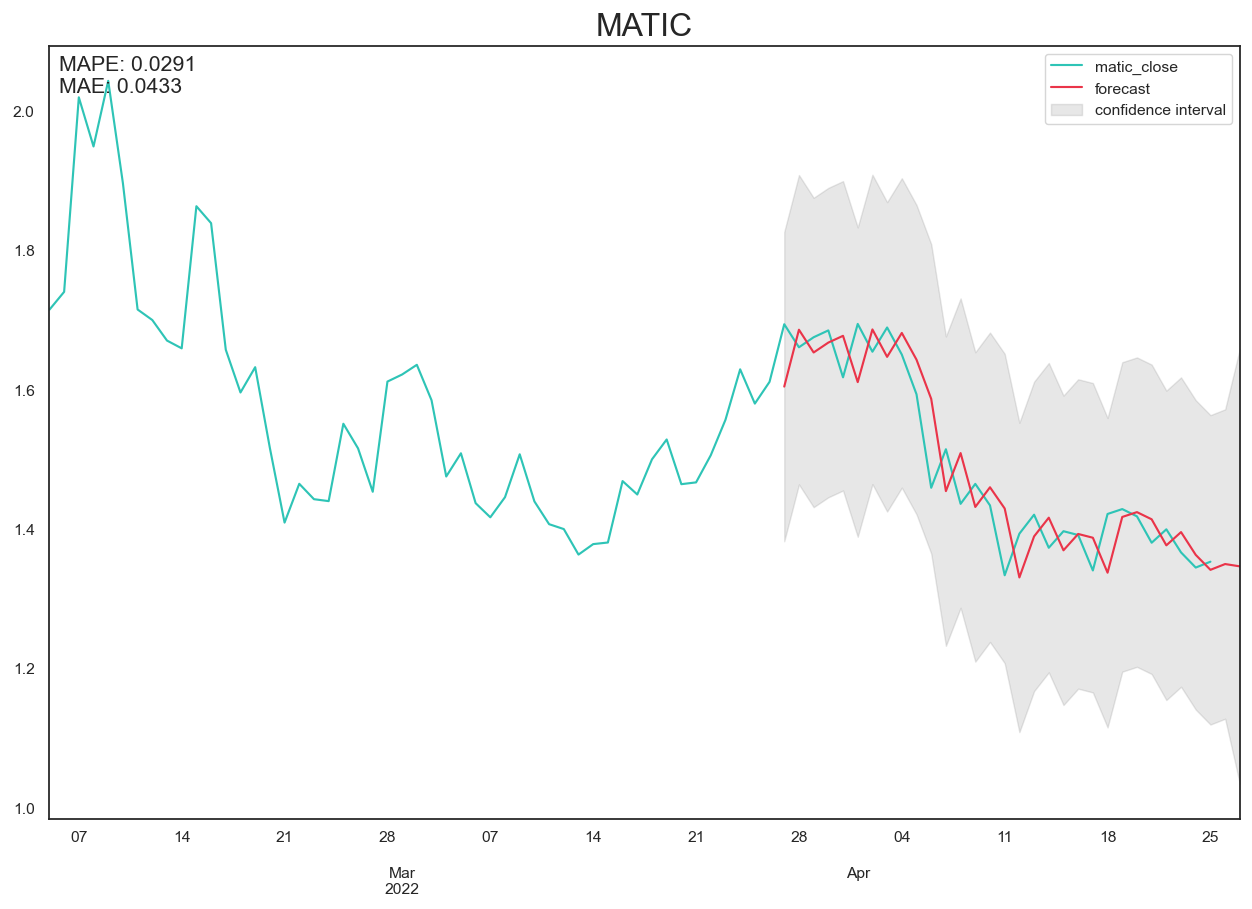

*********************************************************************************************
********************************** sol **********************************
2020-04-10 2022-04-25


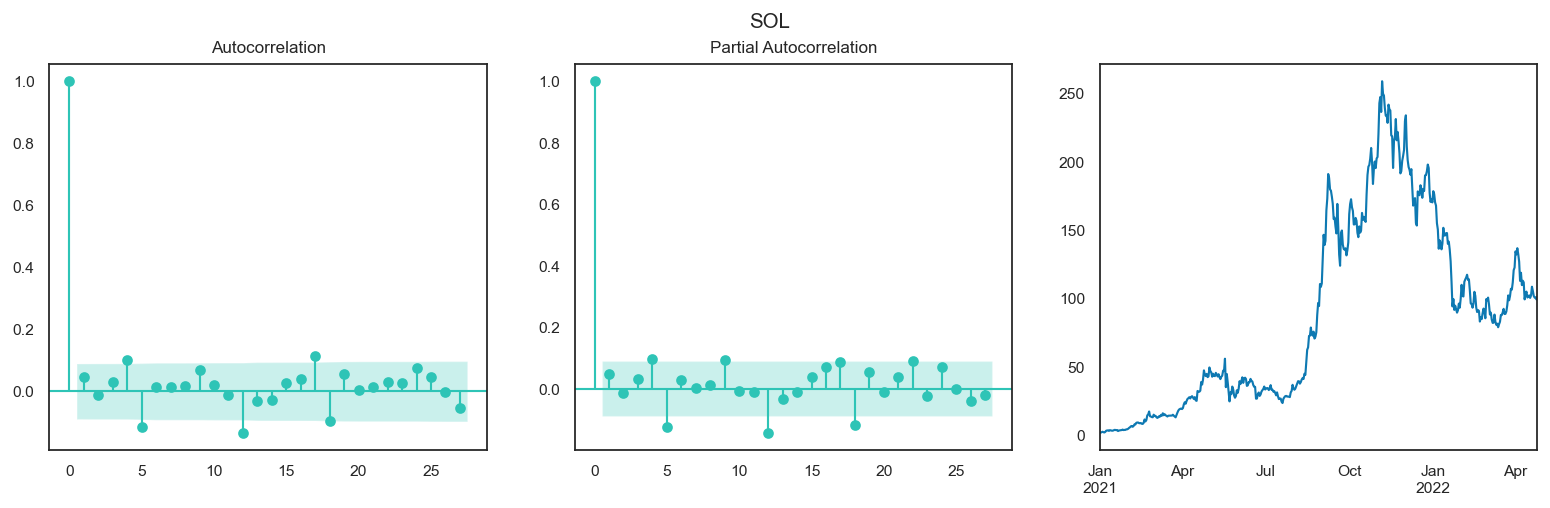

Optimization terminated successfully.
         Current function value: 3.293565
         Iterations: 2
         Function evaluations: 74


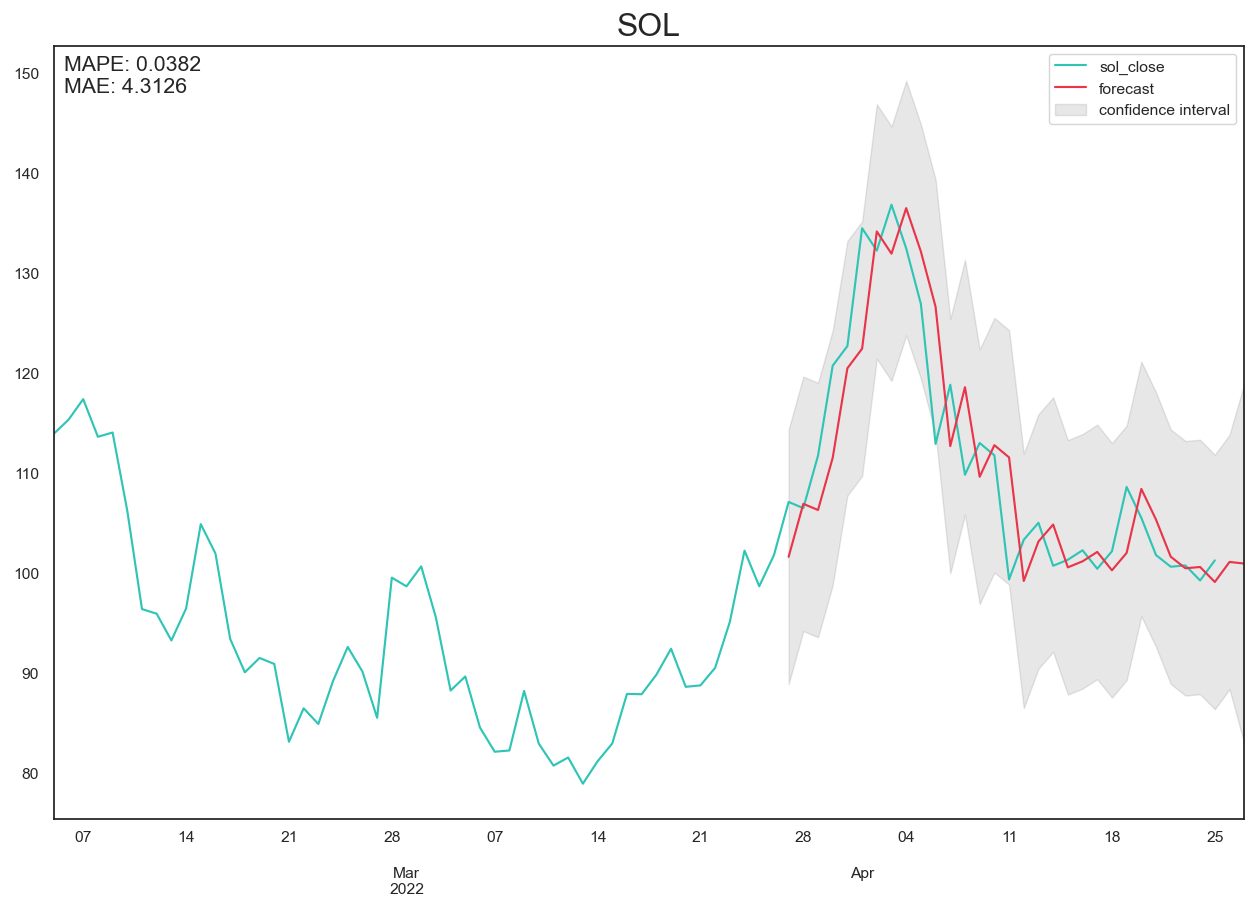

In [39]:
for df_i in range(len(df_coins_list)):
    print('*********************************************************************************************')
    print('**********************************', df_coins_suff[df_i], '**********************************')
    hi = df_coins_suff[df_i] + "_close"
    endog_       = (df_coins_list[df_i]).loc[:,['Date',hi]].dropna()
    endog_['Date'] = pd.to_datetime(endog_['Date'])
    
    endog_start = endog_.loc[:,['Date',hi]].dropna()['Date'].min().strftime('%Y-%m-%d')
    endog_end   = endog_.loc[:,['Date',hi]].dropna()['Date'].max().strftime('%Y-%m-%d')

    print(endog_start, endog_end)


    endog_.index = pd.period_range(endog_start,endog_end,freq='D')

    endog_ = endog_.loc[endog_['Date']>='2021-01-01',:]
    endog_.drop(columns=['Date'], inplace=True)


    
    fig, axes = plt.subplots(1, 3, figsize=(15,4))
    
    endog_.loc[:,[hi]].plot(ax=axes[2], color=CAT_COLORS[1], legend=False)
    
    endog_diff = endog_.copy()
    endog_diff['diff'] = endog_diff[hi].diff()
    endog_diff.dropna(inplace=True)

    sm.graphics.tsa.plot_acf(endog_diff['diff'], ax=axes[0])
    sm.graphics.tsa.plot_pacf(endog_diff['diff'], method="ywm", ax=axes[1])
    
    fig.suptitle(str.upper(df_coins_suff[df_i]))

    plt.show()
    
    
    
    mod = sm.tsa.SARIMAX(endog_.iloc[:450], order=(1, 0, 0), trend='c', enforce_stationarity=True, enforce_invertibility=True) #, seasonal_order=(0,0,0,0))
    res_subset = mod.fit(method="powell", cov_type="robust")    
    #print(res_subset.summary())
    
    
    mod_full = sm.tsa.SARIMAX(endog_, order=(1, 0, 0), trend='c', enforce_stationarity=True, enforce_invertibility=True) #, seasonal_order=(0,0,0,0))
    res_full = mod_full.filter(res_subset.params)
    
    pred = res_full.get_prediction(start=450, end=481, dynamic=False)
    pred_frame = pred.summary_frame()
    
    endog_['forecast']= pred.predicted_mean
    forecasted_endog = pd.concat([endog_,pd.DataFrame(pred.predicted_mean).rename(columns={'predicted_mean':'forecast'}).iloc[-2:,:]])    
    
    
    save_fig(str.upper(df_coins_suff[df_i])+'_ACF_PACF', fig)
    
    plt.show()
    
    mape_ = "MAPE: " + str(round(mean_absolute_percentage_error(endog_[[hi]].iloc[450:,:],endog_[['forecast']].iloc[450:,:]),4))
    mape_ += "\nMAE: " + str(round(mean_absolute_error(endog_[[hi]].iloc[450:,:],endog_[['forecast']].iloc[450:,:]),4))

    fig, ax = plt.subplots(figsize=(11,5))
    endog_[[hi]].iloc[400:,:].plot(figsize=(12,8), ax=ax, color=CAT_COLORS[0])
    forecasted_endog[['forecast']].iloc[400:,:].plot(figsize=(12,8), ax=ax, color=CAT_COLORS[-1])

    ax.fill_between(pred_frame.index, pred_frame['mean_ci_lower'], pred_frame['mean_ci_upper'], color='k', alpha=0.1, label='confidence interval');

    ax.annotate(mape_, size=12,
                xy=(0, 1), xycoords='axes fraction',
                xytext=(10, -10), textcoords='offset pixels',
                horizontalalignment='left',
                verticalalignment='top')


    plt.title(str.upper(df_coins_suff[df_i]), fontsize=18)
    plt.legend()    
    save_fig(str.upper(df_coins_suff[df_i])+'_TS', fig)
    plt.show()

## Get external data

In [40]:
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

START_DATE = df_merged['Date'].min().strftime('%Y-%m-%d')
END_DATE = df_merged['Date'].max().strftime('%Y-%m-%d')

print(START_DATE, END_DATE)

2017-04-26 2022-04-25


In [41]:
#data = pdr.get_data_yahoo("NIM", start=START_DATE, end=END_DATE)

In [42]:
## Gold prices as proxy for risk-aversion
gold_symbol = "GC=F"
gold_data = pdr.get_data_yahoo(gold_symbol, start=START_DATE, end=END_DATE)
gold_data = gold_data.reset_index()

[*********************100%***********************]  1 of 1 completed


In [43]:
## SP500 prices 
spy_symbol = "SPY"
spy_data = pdr.get_data_yahoo(spy_symbol, start=START_DATE, end=END_DATE)
spy_data = spy_data.reset_index()

[*********************100%***********************]  1 of 1 completed


In [44]:
spy_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-25,237.910004,238.949997,237.809998,238.550003,218.600021,76698300
1,2017-04-26,238.509995,239.529999,238.350006,238.399994,218.462570,84702500
2,2017-04-27,238.770004,238.949997,237.979996,238.600006,218.645828,57410300
3,2017-04-28,238.899994,238.929993,237.929993,238.080002,218.169342,63532800
4,2017-05-01,238.679993,239.169998,238.199997,238.679993,218.719147,66882500
...,...,...,...,...,...,...,...
1254,2022-04-18,436.809998,439.750000,435.609985,437.970001,437.970001,66002500
1255,2022-04-19,437.859985,445.799988,437.679993,445.040009,445.040009,77821000
1256,2022-04-20,446.920013,447.570007,443.480011,444.709991,444.709991,65224400
1257,2022-04-21,448.540009,450.010010,437.100006,438.059998,438.059998,85417300


In [45]:
## VIX prices 
vix_symbol = "^VIX"
vix_data = pdr.get_data_yahoo(vix_symbol, start=START_DATE, end=END_DATE)
vix_data = vix_data.reset_index()



[*********************100%***********************]  1 of 1 completed


## Train Test Split

In [46]:
## Shape minus number of days

In [47]:
def rolling_window_split(df_, train_size, test_size, inc_size=1):
    """
    Creates rolling window split and returns two lists of the same size,
    where test[i] is the test set for train[i]
    Optionally provide increment size for window 
    """
    df_tosplit = df_.copy()
    test = []
    train = []
    data_len = len(df_tosplit)
    split_len = 0

    while split_len+test_size+train_size <= data_len :
        train.append(df_tosplit.iloc[split_len:split_len+train_size,:])
        test.append(df_tosplit.iloc[split_len+train_size:split_len+train_size+test_size,:])

        split_len += inc_size
    
    return train, test


In [48]:
ada_train, ada_test = rolling_window_split(df_ada, 14, 2)

In [49]:
#ada_train[200]

In [50]:
#ada_test[200]

### How to use

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
#############################
## 
## This is an example only to show 
## how to use the rolling window split.
## 
## We shouldn't use any of the info 
## from the day being predicted !!!
## 
#############################


lr_predictions = []
lr_truths = []
lr_scores = []

ada_cols = ['adj_close', 'close', 'high', 'low', 'open']
ada_y = 'volume'

ada_train, ada_test = rolling_window_split(df_ada.dropna(), 14, 1)

for i in range(len(ada_train)):
    
    ## fit the model on the train window i, i.e. ada_train[i] 
    lr = LinearRegression().fit(ada_train[i][ada_cols], ada_train[i][ada_y])
    
    ## predict on test window i
    lr_pred_ = lr.predict(ada_test[i][ada_cols])
    
    ## get predictions
    lr_predictions.append(lr_pred_.tolist())
    
    ## get equivalent truths
    lr_truths.append(ada_test[i][ada_y].tolist())
    

## realign truth and predictions by removing the last truth value
lr_predictions = lr_predictions[1:]
lr_truths = lr_truths[:-1]

## flatten predictions and truths because they are list of lists. 
## you can see the difference by using test_size of 2 instead

flat_predictions = [i for sublist in lr_predictions for i in sublist]
flat_truths = [i for sublist in lr_truths for i in sublist]

    

In [53]:
len(lr_predictions)

1614

In [54]:
#lr_truths[1614]

In [55]:
flat_predictions[0] ## flattened list

4945587.048180601

In [56]:
lr_truths[0]

[5132300.0]

In [57]:
flat_truths[0]

5132300.0

In [58]:

mean_absolute_percentage_error(flat_truths, flat_predictions)


0.36561537863658566